# Notebook to explore tweets containing specific keywords

This notebook contains our initial testing of the tools we will use. This includes snscrape for downloading tweets, googletrans for translating tweets and tweepy for getting user data. We want to see how these tools can work together so that in the following notebooks

Note that this must be run locally using the dev version of snscrape as found in environment.yml (running via a local runtime on google colab will not work)

To run jupyter notebook using a particular environment do in the terminal: 

<code>conda install -c anaconda ipykernel<code>
<code>python -m ipykernel install --user --name=env name<code>
    
Then select the environment from the kernel dropdown menu

In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from tqdm import tqdm

In [3]:
# Creating list to append tweet data to
keywords_list = ['ukraine']
since = '2022-02-24'
until = '2022-03-14'
num_tweets = 1000


### Initial search to gauge what we can find

In [ ]:
# Using TwitterSearchScraper to scrape data and append tweets to list
tweets_list = []
for i,tweet in enumerate(tqdm(sntwitter.TwitterSearchScraper(keyword + ' since:' + since + ' until:' + until).get_items())):
    if i > num_tweets:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.lang])
    
# Creating a dataframe from the tweets list above
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Like Count', 'Display Name', 'Language'])


In [ ]:
# As a function
def download_tweets_by_keyword(keyword):
    tweets_list = []
    # Using TwitterSearchScraper to scrape data and append tweets to list
    for i,tweet in enumerate(tqdm(sntwitter.TwitterSearchScraper(keyword + ' since:' + since + ' until:' + until).get_items())):
        if i > num_tweets:
            break
        tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.lang])
    
    # Creating a dataframe from the tweets list above
    tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Like Count', 'Display Name', 'Language'])
    return tweets_df

In [ ]:
tweets_df_list = []
for keyword in keywords_list:
    print(keywords_list, keyword)
    tweets_df = download_tweets_by_keyword(keyword)
    tweets_df_list.append(tweets_df)
    print(tweets_df.head(20))

In [4]:
# Just pandas display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
tweets_df_list[0].head(20)

/var/folders/hx/0dxb0wn51wx5pscstjkwf2gc000qqf/T/ipykernel_64730/3961818741.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


NameError: name 'tweets_df_list' is not defined

In [15]:
# Search for specific languages
# Using TwitterSearchScraper to scrape data and append tweets to list
tweets_list = []
keyword = 'ukraine'
for i,tweet in enumerate(tqdm(sntwitter.TwitterSearchScraper(keyword + ' since:' + since + ' until:' + until + ' lang:en').get_items())):
    if i > num_tweets:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.lang])
    
# Creating a dataframe from the tweets list above
tweets_en_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Like Count', 'Display Name', 'Language'])

tweets_en_df.head(1000)

1001it [00:37, 26.76it/s]


Datetime             Tweet Id  \
0   2022-03-13 23:59:59+00:00  1503158967777869827   
1   2022-03-13 23:59:59+00:00  1503158966603427841   
2   2022-03-13 23:59:59+00:00  1503158965273870344   
3   2022-03-13 23:59:59+00:00  1503158964225150977   
4   2022-03-13 23:59:58+00:00  1503158963654651907   
5   2022-03-13 23:59:58+00:00  1503158963428331529   
6   2022-03-13 23:59:58+00:00  1503158963076046849   
7   2022-03-13 23:59:58+00:00  1503158960379019270   
8   2022-03-13 23:59:57+00:00  1503158958848106498   
9   2022-03-13 23:59:57+00:00  1503158957707350018   
10  2022-03-13 23:59:56+00:00  1503158952900501506   
11  2022-03-13 23:59:56+00:00  1503158952896434179   
12  2022-03-13 23:59:55+00:00  1503158948836392961   
13  2022-03-13 23:59:55+00:00  1503158948798468098   
14  2022-03-13 23:59:54+00:00  1503158947011727365   
15  2022-03-13 23:59:54+00:00  1503158946940530694   
16  2022-03-13 23:59:54+00:00  1503158946428710912   
17  2022-03-13 23:59:54+00:00  1503158944981667840   
18  2022-03-13 23:59:54+00:00  1503158943136493572   
19  2022-03-13 23:59:53+00:00  1503158942515535873   
20  2022-03-13 23:59:53+00:00  1503158939634094081   
21  2022-03-13 23:59:53+00:00  1503158939298705409   
22  2022-03-13 23:59:52+00:00  1503158937461395456   
23  2022-03-13 23:59:52+00:00  1503158937230663681   
24  2022-03-13 23:59:52+00:00  1503158937096388611   
25  2022-03-13 23:59:52+00:00  1503158936253480960   
26  2022-03-13 23:59:52+00:00  1503158935477444611   
27  2022-03-13 23:59:52+00:00  1503158934848544768   
28  2022-03-13 23:59:51+00:00  1503158934256857091   
29  2022-03-13 23:59:51+00:00  1503158933032079365   
30  2022-03-13 23:59:51+00:00  1503158932281638914   
31  2022-03-13 23:59:51+00:00  1503158931950080003   
32  2022-03-13 23:59:51+00:00  1503158931052326915   
33  2022-03-13 23:59:50+00:00  1503158929576329218   
34  2022-03-13 23:59:50+00:00  1503158928481398784   
35  2022-03-13 23:59:50+00:00  1503158926895837186   
36  2022-03-13 23:59:49+00:00  1503158925864194048   
37  2022-03-13 23:59:49+00:00  1503158925780152320   
38  2022-03-13 23:59:49+00:00  1503158924551364623   
39  2022-03-13 23:59:49+00:00  1503158922219249666   
40  2022-03-13 23:59:48+00:00  1503158919690354689   
41  2022-03-13 23:59:48+00:00  1503158919203594243   
42  2022-03-13 23:59:48+00:00  1503158918641557507   
43  2022-03-13 23:59:47+00:00  1503158915244216322   
44  2022-03-13 23:59:47+00:00  1503158914518462469   
45  2022-03-13 23:59:46+00:00  1503158913520312328   
46  2022-03-13 23:59:46+00:00  1503158912094154752   
47  2022-03-13 23:59:46+00:00  1503158910207033344   
48  2022-03-13 23:59:44+00:00  1503158904666333184   
49  2022-03-13 23:59:44+00:00  1503158903495745538   
50  2022-03-13 23:59:44+00:00  1503158901318975488   
51  2022-03-13 23:59:44+00:00  1503158901096652800   
52  2022-03-13 23:59:43+00:00  1503158900266201088   
53  2022-03-13 23:59:43+00:00  1503158900014653440   
54  2022-03-13 23:59:43+00:00  1503158898878042112   
55  2022-03-13 23:59:42+00:00  1503158895472164864   
56  2022-03-13 23:59:42+00:00  1503158894054543363   
57  2022-03-13 23:59:41+00:00  1503158891953238021   
58  2022-03-13 23:59:41+00:00  1503158890917085186   
59  2022-03-13 23:59:41+00:00  1503158889541480448   
60  2022-03-13 23:59:41+00:00  1503158889252102145   
61  2022-03-13 23:59:40+00:00  1503158886731169794   
62  2022-03-13 23:59:40+00:00  1503158886697562113   
63  2022-03-13 23:59:39+00:00  1503158883165999105   
64  2022-03-13 23:59:39+00:00  1503158880737665025   
65  2022-03-13 23:59:38+00:00  1503158878393053190   
66  2022-03-13 23:59:38+00:00  1503158877755375616   
67  2022-03-13 23:59:38+00:00  1503158875893243907   
68  2022-03-13 23:59:37+00:00  1503158875683540999   
69  2022-03-13 23:59:37+00:00  1503158874001444871   
70  2022-03-13 23:59:37+00:00  1503158873896767489   
71  2022-03-13 23:59:37+00:00  1503158873087266817   
72  2022-03-13 23:59:36+00:00  1503158871476498439   
73  2022-03-13 23:59:36+0

In [7]:
# Using TwitterSearchScraper to scrape data and append tweets to list
keyword = 'украина'
tweets_list = []
for i,tweet in enumerate(tqdm(sntwitter.TwitterSearchScraper(keyword + ' since:' + since + ' until:' + until + ' lang:ru').get_items())):
    if i > num_tweets:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.lang])
    
# Creating a dataframe from the tweets list above
tweets_ru_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Like Count', 'Display Name', 'Language'])

tweets_ru_df.head(1000)

1001it [00:44, 22.37it/s]


Datetime             Tweet Id  \
0   2022-03-13 23:59:43+00:00  1503158897476997121   
1   2022-03-13 23:59:08+00:00  1503158753965002752   
2   2022-03-13 23:58:52+00:00  1503158686855925764   
3   2022-03-13 23:58:35+00:00  1503158615242416132   
4   2022-03-13 23:58:28+00:00  1503158584233836547   
5   2022-03-13 23:57:40+00:00  1503158382953390080   
6   2022-03-13 23:56:50+00:00  1503158173414400002   
7   2022-03-13 23:56:42+00:00  1503158141067964420   
8   2022-03-13 23:54:30+00:00  1503157587503632387   
9   2022-03-13 23:54:05+00:00  1503157483275440128   
10  2022-03-13 23:53:35+00:00  1503157356582129670   
11  2022-03-13 23:52:54+00:00  1503157183378251778   
12  2022-03-13 23:52:49+00:00  1503157164076150784   
13  2022-03-13 23:52:18+00:00  1503157032328835080   
14  2022-03-13 23:52:13+00:00  1503157012489715715   
15  2022-03-13 23:51:17+00:00  1503156774878154756   
16  2022-03-13 23:50:45+00:00  1503156641969192960   
17  2022-03-13 23:50:19+00:00  1503156533504454661   
18  2022-03-13 23:47:06+00:00  1503155724003811335   
19  2022-03-13 23:47:05+00:00  1503155720233041921   
20  2022-03-13 23:47:04+00:00  1503155716013625349   
21  2022-03-13 23:47:03+00:00  1503155711773229060   
22  2022-03-13 23:45:09+00:00  1503155233194758147   
23  2022-03-13 23:45:05+00:00  1503155217063464961   
24  2022-03-13 23:44:31+00:00  1503155072351739905   
25  2022-03-13 23:44:28+00:00  1503155061245243393   
26  2022-03-13 23:44:02+00:00  1503154953250082818   
27  2022-03-13 23:43:19+00:00  1503154772500701185   
28  2022-03-13 23:42:37+00:00  1503154596767834116   
29  2022-03-13 23:42:15+00:00  1503154503134199813   
30  2022-03-13 23:41:51+00:00  1503154403850993667   
31  2022-03-13 23:40:45+00:00  1503154125235707906   
32  2022-03-13 23:38:34+00:00  1503153575068901380   
33  2022-03-13 23:36:27+00:00  1503153042899746816   
34  2022-03-13 23:35:23+00:00  1503152776603443201   
35  2022-03-13 23:35:16+00:00  1503152744558956552   
36  2022-03-13 23:31:49+00:00  1503151877902458885   
37  2022-03-13 23:31:29+00:00  1503151794804957186   
38  2022-03-13 23:30:28+00:00  1503151539397050370   
39  2022-03-13 23:30:03+00:00  1503151433008435207   
40  2022-03-13 23:28:29+00:00  1503151039779909634   
41  2022-03-13 23:27:45+00:00  1503150854043742208   
42  2022-03-13 23:25:31+00:00  1503150290580779013   
43  2022-03-13 23:24:31+00:00  1503150040071741444   
44  2022-03-13 23:24:22+00:00  1503150001354121217   
45  2022-03-13 23:24:13+00:00  1503149963806654470   
46  2022-03-13 23:24:11+00:00  1503149957221695491   
47  2022-03-13 23:24:03+00:00  1503149923222626311   
48  2022-03-13 23:23:05+00:00  1503149681295216648   
49  2022-03-13 23:22:45+00:00  1503149594653302787   
50  2022-03-13 23:22:32+00:00  1503149539838021633   
51  2022-03-13 23:22:07+00:00  1503149438579224580   
52  2022-03-13 23:21:22+00:00  1503149248040288269   
53  2022-03-13 23:21:22+00:00  1503149246362566657   
54  2022-03-13 23:21:06+00:00  1503149182508544002   
55  2022-03-13 23:20:52+00:00  1503149122328616965   
56  2022-03-13 23:19:51+00:00  1503148865536462854   
57  2022-03-13 23:19:45+00:00  1503148840718901248   
58  2022-03-13 23:18:56+00:00  1503148635764281352   
59  2022-03-13 23:16:55+00:00  1503148126781296640   
60  2022-03-13 23:16:34+00:00  1503148040429117440   
61  2022-03-13 23:16:24+00:00  1503147998188032015   
62  2022-03-13 23:16:20+00:00  1503147982136516619   
63  2022-03-13 23:15:30+00:00  1503147770542268421   
64  2022-03-13 23:15:20+00:00  1503147730583101449   
65  2022-03-13 23:15:16+00:00  1503147711582908416   
66  2022-03-13 23:13:28+00:00  1503147258044456961   
67  2022-03-13 23:11:37+00:00  1503146794858987521   
68  2022-03-13 23:11:32+00:00  1503146774269243396   
69  2022-03-13 23:11:22+00:00  1503146730614935557   
70  2022-03-13 23:10:57+00:00  1503146626864484356   
71  2022-03-13 23:10:12+00:00  1503146437944692747   
72  2022-03-13 23:09:48+00:00  1503146337507942409   
73  2022-03-13 23:08:59+0

In [5]:
# Using TwitterSearchScraper to scrape data and append tweets to list
tweets_list = []
keyword = 'україни'
for i,tweet in enumerate(tqdm(sntwitter.TwitterSearchScraper(keyword + ' since:' + since + ' until:' + until + ' lang:uk').get_items())):
    if i > num_tweets:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.user.displayname, tweet.lang])
    
# Creating a dataframe from the tweets list above
tweets_uk_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Like Count', 'Display Name', 'Language'])

tweets_uk_df.head(1000)

1001it [00:34, 29.23it/s]


Datetime             Tweet Id  \
0   2022-03-13 23:59:09+00:00  1503158755709571074   
1   2022-03-13 23:57:13+00:00  1503158271426842634   
2   2022-03-13 23:56:37+00:00  1503158119672725508   
3   2022-03-13 23:56:22+00:00  1503158054979833861   
4   2022-03-13 23:55:51+00:00  1503157926646763520   
5   2022-03-13 23:54:42+00:00  1503157635578793989   
6   2022-03-13 23:54:29+00:00  1503157581510225921   
7   2022-03-13 23:54:18+00:00  1503157534630330368   
8   2022-03-13 23:53:44+00:00  1503157392648847363   
9   2022-03-13 23:52:48+00:00  1503157157805674499   
10  2022-03-13 23:51:54+00:00  1503156930164006912   
11  2022-03-13 23:50:55+00:00  1503156683144667137   
12  2022-03-13 23:50:37+00:00  1503156608418791427   
13  2022-03-13 23:49:44+00:00  1503156387903377409   
14  2022-03-13 23:49:19+00:00  1503156280613081089   
15  2022-03-13 23:48:18+00:00  1503156027621244928   
16  2022-03-13 23:48:13+00:00  1503156004598521862   
17  2022-03-13 23:47:01+00:00  1503155702705098752   
18  2022-03-13 23:45:30+00:00  1503155319605960704   
19  2022-03-13 23:45:24+00:00  1503155296931299328   
20  2022-03-13 23:44:15+00:00  1503155005779582978   
21  2022-03-13 23:43:34+00:00  1503154835964768260   
22  2022-03-13 23:43:17+00:00  1503154763332042756   
23  2022-03-13 23:42:11+00:00  1503154486201954304   
24  2022-03-13 23:39:08+00:00  1503153718371360770   
25  2022-03-13 23:38:03+00:00  1503153444718317572   
26  2022-03-13 23:33:29+00:00  1503152298264047619   
27  2022-03-13 23:32:53+00:00  1503152144425398272   
28  2022-03-13 23:32:24+00:00  1503152025462317063   
29  2022-03-13 23:32:13+00:00  1503151977190068225   
30  2022-03-13 23:31:45+00:00  1503151860131287041   
31  2022-03-13 23:31:44+00:00  1503151856402456582   
32  2022-03-13 23:30:59+00:00  1503151669676236802   
33  2022-03-13 23:30:23+00:00  1503151514956800001   
34  2022-03-13 23:27:39+00:00  1503150828324012033   
35  2022-03-13 23:27:32+00:00  1503150800125796359   
36  2022-03-13 23:26:56+00:00  1503150648908386313   
37  2022-03-13 23:26:31+00:00  1503150545611198467   
38  2022-03-13 23:25:27+00:00  1503150276001284097   
39  2022-03-13 23:25:21+00:00  1503150248486707203   
40  2022-03-13 23:21:53+00:00  1503149376591613966   
41  2022-03-13 23:21:47+00:00  1503149351979601920   
42  2022-03-13 23:21:45+00:00  1503149343762755588   
43  2022-03-13 23:21:40+00:00  1503149322812067840   
44  2022-03-13 23:20:22+00:00  1503148994603757571   
45  2022-03-13 23:20:01+00:00  1503148907781623823   
46  2022-03-13 23:19:12+00:00  1503148704437575683   
47  2022-03-13 23:18:47+00:00  1503148597407330309   
48  2022-03-13 23:17:53+00:00  1503148372047409153   
49  2022-03-13 23:17:53+00:00  1503148369828528136   
50  2022-03-13 23:16:43+00:00  1503148077531680768   
51  2022-03-13 23:16:00+00:00  1503147897847754763   
52  2022-03-13 23:15:20+00:00  1503147728565583879   
53  2022-03-13 23:15:02+00:00  1503147653248471057   
54  2022-03-13 23:14:23+00:00  1503147492224942083   
55  2022-03-13 23:14:16+00:00  1503147462814490635   
56  2022-03-13 23:13:44+00:00  1503147327833448457   
57  2022-03-13 23:13:02+00:00  1503147149198082052   
58  2022-03-13 23:12:55+00:00  1503147122916573186   
59  2022-03-13 23:12:13+00:00  1503146943081590785   
60  2022-03-13 23:11:13+00:00  1503146692677443591   
61  2022-03-13 23:10:22+00:00  1503146478856024069   
62  2022-03-13 23:10:14+00:00  1503146447344181248   
63  2022-03-13 23:07:55+00:00  1503145862771494920   
64  2022-03-13 23:06:39+00:00  1503145542502821894   
65  2022-03-13 23:05:48+00:00  1503145331244302337   
66  2022-03-13 23:04:37+00:00  1503145033142358024   
67  2022-03-13 23:04:15+00:00  1503144940938969099   
68  2022-03-13 23:03:48+00:00  1503144828233781252   
69  2022-03-13 23:01:12+00:00  1503144173884608519   
70  2022-03-13 23:00:46+00:00  1503144063867969537   
71  2022-03-13 23:00:45+00:00  1503144058532814848   
72  2022-03-13 23:00:13+00:00  1503143924080201732   
73  2022-03-13 23:00:02+0

We can download tweets in English, Russian and Ukrainian, here for 'ukraine', 'украина' (Ukraine in Russian) or 'україни' (Ukraine in Ukrainian).

### Let's create a wordcloud to gauge what we can see

In [6]:
from PIL import Image
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
import matplotlib.pyplot as plt

There are 162826 words in the combination of all review.


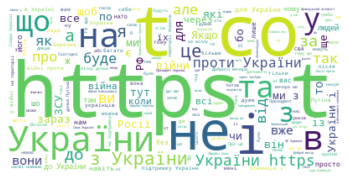

In [7]:
text = " ".join(text for text in tweets_uk_df.Text)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
" ".join(text for text in tweets_en_df.Text)

'The world’s largest maker of gold and silver mining material, sodium cyanide, has been forced to suspend production in Europe after Russia’s invasion of Ukraine sent energy prices soaring. @PoulinLuke @historyoarmani2 The geopolitics is another topic, but you want to get my focus off the Nazis. I won\'t. It is wrong and it shouldn\'t be tolerated. Ukraine shouldn\'t have these movements or any other country. It is racism. I can\'t believe I have to explain to another human being why racism\'s wrong @KyivIndependent Ohioan here…@senrobportman is no friend of Ukraine as he purports to be. The account below shows how fickled he is. And if you want lots more well documented info check out https://t.co/G7ojowIfw6.  Ohioans stand w/ Ukraine, but be wary @senrobportman 🙏\nhttps://t.co/dRSUrkSFri @Zinvor It’s probably easier to believe in that than accept that our own government created the inflation problem by printing knowing full well it would create an inflation… Ukraine is just a cover s

These tweets will obviously need to be cleaned

### We can translate tweets into English

There are sentiment analysis tools for Russian and Ukrainian (e.g. https://github.com/bureaucratic-labs/dostoevsky, https://github.com/skupriienko/Ukrainian-Sentiment-Analysis). These may well be better than translating the tweets into English and using an English sentiment analysis tool since they would pick up on all the subtleties and nuances of the languages and also the translator often just mistranslates or translates poorly. Nevertheless for a first pass it will be simplest to translate all tweets into English and analyse them the same way. 

Using native sentiment analysis may also complicate comparisons because they are designed differently e.g. the Ukrainian sentiment scores are either -1 or +1 wheras the English scores can be -4, -3, -2, -1, 0, 1, 2, ,3 ,4.

Who knows; if we do both ways we may discover sentiment based on the *language* itself rather than the pure word content (see https://github.com/text-machine-lab/rusentiment/blob/master/Guidelines/guidelines_%5BRU%5D.md)

In [23]:
from googletrans import Translator
translator = Translator()
from IPython.display import clear_output
import time

tweets_ru_translated = []
for idx, tweet in tweets_ru_df.iterrows():
    print(idx, tweet['Text'])
    text = tweet['Text']
    text_translated = translator.translate(text,src='ru').text
    print(text_translated)
    tweets_ru_translated.append([tweet['Datetime'], tweet['Tweet Id'], text_translated, tweet['Username'], tweet['Like Count'], tweet['Display Name'], tweet['Language']])
   
    if idx >0 and idx%100 == 0: 
        time.sleep(120) # Important to bypass google restrictions!
        
tweets_ru_trans_df = pd.DataFrame(tweets_ru_translated, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Like Count', 'Display Name', 'Language'])

0 @JamesOReilly3 @junk5t @Change И правильно бояться. Россия не Украина. В России большинство за Путина. А меньшинство...Нравится ее нравится ....
Печенье Нуланд в Россию не подвезёшь
@ Jamesoreilly3 @ junk5t @change and fear correctly.Russia is not Ukraine.In Russia, most of Putin.And a minority ... Like her like it ....
Cookies Nuland to Russia will not be long
1 «Украина тоже виновата».  
Может быть какая-то ответственность.
Но не многие.

Можете ли вы доказать, что у вас есть то, чего у вас еще нет?

Поэтому на Россию, которая вторглась раньше, лежит большая ответственность.
"Ukraine is also to blame."
Maybe some responsibility.
But not many.

Can you prove that you have something else yet?

Therefore, Russia, which invaded earlier, is a big responsibility.
2 Жители Бердянска, Украина, вышли на улицы в знак протеста против российского вторжения. Они скандируют: «#Бердянск – это #Украина !» https://t.co/iiiuzyfwGT
Residents of Berdyansk, Ukraine, went to the streets in protest again

Opinions: Why Donbass is not Ukraine https://t.co/g2bacmelfc
22 На стриме прямого Гармаш обмолвился что когда росия травила людей химическим оружием в Алеппо - Украина увеличивала товарооборт с росией.То есть,  порохоботы на время войны перестали критиковать зеленского, а зелебобы в это время решили что можно мочить Пороха под шумок?
On the Streaming of the Direct Harmash, it was mentioned that when Rosia of the people of people with chemical weapons in Aleppo - Ukraine increased merchandise with Russia. It is, powdered for the time of the war stopped criticizing Zelensky, and the zelebobes at this time decided that you could wet the gunpowder at that time?
23 @n_ma_pag Украина ‐ вы победили в войне за свою страну! Сам Господь Иисус Христос будет стрелять за вас! Храни Господь Украину! Да будет проклята россия на уничтожение, распад, на тяжкие мучения! россия будет разрушена, народы будут свободные!
@N_MA_PAG Ukraine - You won the war for your country!Lord Jesus Himself will shoot for 

@senko Obviously, Ukraine will destroy the army of the invaders using allies weapons.I wonder who from Russia will sign the capitulation, because Putin is most likely eliminating their oligarchs
43 @AlexAvduevsky А что такое «первая экономика мира» и как конкретно она давит на транснациональную кока-колу?
Мне понравилось чьё-то определение происходящего как, простите, WW3. Просто танками в ней воет только РФ и Украина, а остальные страны и - самостоятельно! - бизнес воюет вот так.
@AlexAvduevsky and what is the "first economy of the world" and how specifically it presses on the transnational coca-cola?
I liked someone's definition of what is happening as, sorry, WW3.Just the tanks in it only the Russian Federation and Ukraine, and the rest of the country and - on their own!- Business fights like this.
44 Они дали четкий политический сигнал: Украина принадлежит к европейской семье. Работу по присоединению Украины к ЕС начали. Процесс пошел".
They gave a clear political signal: Ukraine b

Breaking not to build.Now many businesses are collapsed.And when all the ends remain two countries.Ukraine, which will be restored to the whole world.And the Russian Federation of which dick who will give money.How we will create something if even in the best years could not be incomprehensible to me
62 НАРЦИССИЗМ

Матери солдат в течение, например, этого начавшегося периода - проверка тезиса, что русские / россияне - такие же люди, как остальные на планете.

#Russia #Украина #Russian #Ukraine️ #UkraineRussiaWar #Россия #свобода #гулаг #дети #Children #НетвойневУкраине
Narcissism

Mother of Soldier for, for example, this beginning period - checking the thesis that Russian / Russians are the same people like the rest on the planet.

#Russia # Ukraine #russian # Ukraine️ #ukrainerussiawar # Russia # freedom # gulag # children #children # non-view
63 @max_katz @kiriltaran @MissLy37395173 Центром постсоветского мира всегда будет Москва. Особенно после ухода Путина. А Украина всегда будет с

We will not close the sky

This was stated by the Minister of Economy of Germany Robert Habek in an interview with Frankfurter Allgemeine.

"For Europe, for NATO, for the West was a mistake to keep an open door for Ukraine and at the same time say: you can not go there. It annoys.

Ukraine felt https://t.co/5go3w8vy7i
81 Сделала мем сегодня о ситуации с моей странной( Украина) и страной моих подруг( Россия). Какого-то хуя самый обиженный казах оказался. Видеть ли его напрягают мамы которые оскорбляют русских. А ниче что у нас все таки война а у них макдональдс просто закрылся?
Made a member today about the situation with my strange (Ukraine) and my girlfriends (Russia).Some fucking most offended Kazakh was.To see him straining moms who insult Russians.And what about us all the same war and they just closed McDonalds?
82 @jelloslug @muhamma41175225 @nytimes США со своими союзниками всегда устраивали незаконные войны, а у нас под боком Украина устроила геноцид своего народа жителей Донба

By the way Ukraine skillfully defends himself, it hurts, very painfully bogging Russian invaders, I am infinitely grateful to God for the fact that the defense of the country leads such legendary generals like Valery Zalochny, Victor Munets, Sergey Shaptal, Mikhail Rabody ... Believe in them! 👇
100 @KononTrs @chastime "Украина-НАТО", плюс добровольные пожертвования от стран-членов НАТО "по чуть-чуть" (т.е. еще от 300 до 800 млн.). Итого - еще ярд-полтора ежегодно.

Кто плюет в руку дающего, будут целовать жопу отбирающего
@Konontrs @chastime "Ukraine-NATO", plus voluntary donations from NATO member countries "on a little bit" (i.e., another 300 to 800 million).Total - another yard and a half annually.

Who spits in the hand of the giving, will kiss the captive ass
101 @brewerov Теперь дошло почему вас рабами считают, и что Украина Не Россия?
@Brewerov now reached why you are considered slaves, and that Ukraine is not Russia?
102 Украина, день 19-й: новый этап переговоров обещают провес

@bernielomax @xdkonex @roogozin Well, you endured Belgrade, Iraq, Iran, Libya ... Syria .. These are all US projects, as well as Ukraine was supposed to become another project of the United States, it's geopolitics, I don't want Ukrainiansbombed my city with weapons from the USA and NATO countries.
124 Читаю Зеленского: "Наша цель (в переговорах) - чтобы в этой переговорной сложной работе Украина получила нужный результат. Чтобы мы имели гарантии - не как по Будапешту, и не как в нашем небе."
То есть это все, что мы добиваемся от рф?
А Крым? А Донбасс? А контрибуции? Н-да...
I read Zelensky: "Our goal is (in negotiations) - so that Ukraine in this negotiating work is received by the desired result. So that we have guarantees - not like Budapest, and not as in our sky."
That is, all that we achieve from the Russian Federation?
And Crimea?And Donbass?And Contribution?N-yes ...
125 @maximov_vasily В 14-15 годах в Азов немало уехали. Потом Украина на них наплевала. Никаких документов, живи

Today, 20 km from the border of Ukraine-Poland Bakhnul Rocket.I was there on the night there, and this morning it happened.
If NATO does not close the sky will be cunt and poland and everything 🙃 #Natoclosethesky
142 @JoeBiden Так вот Планета Земля - это Сердце Бога, Создателя этой Вселенной! А Сердцем Земли, сего  Мира - Украина, с нами Бог! Значит вы с нами!!!Господин Президент США! Весь Мир сейчас с нами! Какое это время в англ.языке?Вы видите там паст или фьюче?Must have Y&amp;All Now!
@Joebiden So the planet Earth is the heart of God, the creator of this universe!And the heart of the Earth, this world - Ukraine, God with us!So you are with us !!! Mr. President of the United States!The whole world is now with us!What is the time in English? Do you see there Paste or Fucker? Must Have Y & amp; all now!
143 @acochleola @AnnLipwig Да никто не хотел никаких "русских" спасать, равно как и не нуждался там никто в "спасении". Речь об имперском  управлении колонией Украина. И всегда была.


@shipvnks @dmitriyursal came up with the Nazis and "Assumption", but in fact, fascists who kill the Russian-speaking population of Ukraine.You or bot, or you were washed brains.Kherson is Ukraine.Like Mariupol, and Kharkov, and all other cities.
163 Известный российский певец Моргенштерн выпустил новый клип на песню «12».

«Он украинец, я русский. Мы хотим мира. Мы хотим дружбы», – написано в финальных титрах клипа.

Линк на клип: https://t.co/MmRI5rZl93

#новости #украина #news #ukraine #россия #russia https://t.co/8wFM97VHa7
The famous Russian singer Morgenstern released a new video for the song "12".

"He is a Ukrainian, I am Russian.We want the world.We want friendship, "written in the final titers of the clip.

Link on the clip: https://t.co/mmri5rzl93

# News # Ukraine #News #ukraine # Russia #Russia https://t.co/8wfm97vha7
164 @skewleauxid Украина милитаризирована вынужденно, она 8 лет в состоянии военного конфликта. А мне пытались доказать, что все государства должны жить посто

Some of the resources are currently being transferred to Ukrainian and Russian languages, and over time we will replenish the hub with new resources.

#Ukraine # Ukraine # Ukraine #russia # Rosiya #ukrainerussia https://t.co/uy83sp15yn
182 @UncleKostya @Matryoshka_Ru Это Украина. А не дыбило наркоманска рэцпублика.
@UncleKostya @matryoshka_ru This is Ukraine.And did not attempt the drug addict RCPBBLE.
183 @letopisi_rus Дети, а давайте посмотрим в новости и угадаем с трех раз, почему Украина хочет в НАТО?
@letopisi_rus Children, but let's look at the news and guess from three times why Ukraine wants to NATO?
184 @rianru Работа Захаровой - как можно больше врать.
#Украина #нетвойне
@Rianru work Zakharova - to lie as much as possible.
# Ukraine # non-resident
185 @Ness_Ti @GraniTweet Не не не давайте будем честны. Украина не трогала россию и детей этих дальнобойщиков. Ежедневно в Украине гибнет много мирных людей в том числе и детей.
Так вот, все честно и заслужено для каждого жителя рос

According to GlobalCheck, Instagram is officially blocked in Russia.

Service availability: 0%

Some users, however, report that the service continues to work.
# Ukraine #ukrainewar #instagram #Russian https://t.co/5fyiijukpa
206 @Activatica @VladLime Украина прими этих орков...на удобрения...
@ActiveVatica @vladlime Ukraine Accepting these orcs ... on fertilizers ...
207 Было Америка и Европа, а стало Украина, Америка и Европа
There were America and Europe, and became Ukraine, America and Europe
208 @peaceWprevail @UBAHOBO_LIVE Каких именно? Польшу, остальную Европу? Так вроде путин на неё не претендует. Или Украина - союзник США? Да вроде тоже нет.
@peacewpRevail @ubahobo_live What exactly?Poland, the rest of Europe?So it seems Putin does not pretend to her.Or Ukraine - US ally?Yes, it seems either.
209 Не ли ве мрзи цел ден да твитате за политика и украина буквално никаков импакт немате.
Does it be a mourzi denomnant Den yes tweate for politics and Ukraine, the initiative of the imp

Is this the praised second army of the world?Russians, you fucking.

# Ukraine # War # News @ ukraine https://t.co/hxvbfm30ck
231 ⚡️Работа по присоединению Украины к ЕС уже началась, заявил глава представительства ЕС в Украине Матти Маасикас.

 ..дали четкий политический сигнал: Украина принадлежит к европейской семье. Работу по присоединению Украины к ЕС начали. Процесс пошел", - сказал он. https://t.co/smcLn92MAw
EU has already begun on Ukraine's accession to the EU, the head of the EU representative office in Ukraine Matti Maasikas said.

 .. Deli a clear political signal: Ukraine belongs to the European family.The work on the accession of Ukraine to the EU has begun.The process went, "he said. Https://t.co/smcln92maw
232 6) Украина вступает НАТО
6) Ukraine enters NATO
233 Украина регулярно получает вооружения, у нас складывается точно такая же ситуация как в 1941, с той лишь разницей, что тогда на военную кампанию ушли месяцы, а у нас дни!
Дни и часы, которые ушли на анализ, на под

@Glorryyyyyyyy I understand it, but I don't talk about specifically in my twee.The same south of France / Southern France in different languages (not Ukrainian) is found, but there is no perception of sovereign state or not.Therefore, if the historically established perception of "Ukraine under the USSR" is the only reason & gt;
255 Я Же Говорил, Украина, Вас Бог Избрал.
I spoke, Ukraine, you chose you.
256 Уничтожение командного пункта российских оккупантов с помощью БПЛА #Bayraktar / #Украина https://t.co/y46jNWKiFe
Destruction of the Command Point of Russian Ocportants With the help of UAV #Bayraktar / # Ukraine https://t.co/y46jnwkife
257 Херсон, Донбасс, Крым, Харьков, Мариуполь, Донецк, Луганск, Житомир и все остальные населённые пункты Украины - это одна единая Украина. https://t.co/iEU0icvv6j
Kherson, Donbass, Crimea, Kharkov, Mariupol, Donetsk, Lugansk, Zhytomyr and all other settlements of Ukraine - this is one united Ukraine.https://t.co/ieuu0icvv6j.
258 Я в ахуе моя украина

@roedeer__ @ Just_Soldier1 Co., Prati Go to Ukraine Neka Bidi slaughtered OD Light ..
278 Сегодня окончательно завершается эра русского владычества в Украине, которое продолжается в разных формах с середины XVII века. Это сражение длиной почти в 370 лет. И решающий момент в истории человечества, в котором Украина играет главную роль.
Today, the era of Russian rule in Ukraine is completed, which continues in different forms from the middle of the XVII century.This is a battle in almost 370 years.And the decisive moment in the history of mankind in which Ukraine plays a major role.
279 @kroshkabambi реально блять, обвиняют иностраные компании, украину, политиков, байдена но никак не задают себе один простой вопрос
кто, сука, это все начал? точно уж не украина.
@kroshkabambibi is really fucking, accused of foreign companies, Ukraine, politicians, Biden but do not ask themselves one simple question
Who, bitch, did it all start?Exactly not Ukraine.
280 @lapatina_ Клоунская Украина выигрывае

When the end of the war
.
Astroprognosis in war
from Angela Pearl.
.
Ukraine will not lose an independent ...
.
https://t.co/uwc4lwzluh through @youtube
299 @USSRComeBack Кстати, разработка когда-то была украино-белорусская.  После 14 походу Украина локализовала производство у себя, понимая что лука это подхолуй хуйла.
@USsrcomeback By the way, the development was once Ukrainian-Belarusian.After 14 campaign Ukraine localized production, realizing that Luka is piercing the hound.
300 ⚡️ Украина уже уничтожила треть от всего военного потенциала России, – заявил председатель Верховной Рады Украины Руслан Стефанчук.
⚡️ Ukraine has already destroyed a third from the whole military potential of Russia, "Ruslan Stefanchuk said the chairman of the Verkhovna Rada.
301 #Украина: По данным украинских властей, в течение дня 13 марта из 14 #гуманитарных_коридоров, работу которых гарантировала России, работали только 9. Об этом сообщила вице-премьер и министр по вопросам реинтеграции временно оккупи

@Max_Katz About Language: Ukraine will get rid of Russian, despite the fact that it is still a resource that unites large spaces.And I think the rest of the countries will also strive to communicate and conduct business in the national language.
319 ⚡️Геращенко сообщает, что 2,5 часа назад под Васильевкой (Запорожская область) вся техника РФ, которую они накапливали под Мелитополем (около 200 машин) была разбита украинской артиллерией!

#новости #украина #news #ukraine https://t.co/RurpXRgAOh
⚡️Gerschenko reports that 2.5 hours ago, under Vasilyevka (Zaporizhia region), the entire equipment of the Russian Federation, which they accumulated under the Melitopoly (about 200 cars) was divided by Ukrainian artillery!

# News # Ukraine #News #ukraine https://t.co/rrpxrgaoh
320 @dw_russian Нет таких пределов, которые Россия не смогла бы расширить. Если европейцы думают, что не защищая слабого, они не вяжутся в драку, то это иллюзия. Если Украина не выстоит, то следующей будет маленькая европе

# Ukraine: during the day 13.03 of 14 humanitarian corridors, which guaranteed # Russia, worked only 9;More than 5.5 thousand people were evacuated.
https://t.co/nmapmpkruv
339 Подоляк: РФ и Украина подведут предварительные итоги 14 марта - https://t.co/dsgXvIFclc https://t.co/HTLRqfmfnw
PRAIN: RF and Ukraine will put preliminary results on March 14 - https://t.co/dsgxvifclc https://t.co/htlrqfmfnw
340 #израиль #украина Война, чекист Путин, Израиль, катастрофа https://t.co/lFMedDZL0m via @YouTube
# Israel # Ukraine War, Chekist Putin, Israel, catastrophe https://t.co/lfmeddzl0m via @youtube
341 Сергей Меликов поручил правительству Дагестана обеспечить условия для 1268 беженцев из Донецкой и Луганской народных республик.

#Украина #Дагестан #беженцы #Донбасс

Подробнее: https://t.co/RGCmEbRcr4 https://t.co/YsR1PobnMg
Sergey Melikov instructed the Government of Dagestan to provide conditions for 1268 refugees from Donetsk and Lugansk People's Republics.

# Ukraine # Dagestan # refugees #

@ Ig6QF7MFAHDXICK @NTVRU Your massel no one called.Ukraine is a sovereign state and what fucking fuck is your fascist locust in our lands?And Latvia - NATO member and troops invites NATO, to which it has full right.
364 @StalinGulag Шурик, а что он 8 лет не был против войны? Потому, что Украина там верх одерживала, а убитые дети были похер? А тут стоило Бандеровской хунте опиздюлиться, то все шавки, которые под англосаксонским миром, в один миг завыли "наших бьют!"
@Stalingulag Schurik, and what is he 8 years old not against war?Because Ukraine there is a top of the top, and the killed children were like?And here it was worth the Bandera junta, then all the gallops, which under the Anglo-Saxon world, were overwhelmed in one moment "our beat!"
365 @Easy_Blood @max_katz Дуже точне формулювання. 
Стратегия русского наступления построена вокруг того, что якобы Украина хотела напасть на россию. Но у нас никогда не было такого в планах, мы мирная страна, которая хочет развиваться и строить с

@staldermarina @I_ARMY_ORG @Rianru chivo?This is our country, our cities, our citizens.Rashafashism will not pass.Everything will be Ukraine.
384 @Max_Bondar @dboo20000 @zyuzya_17 @bulochkairisa Почему вы не можете понять что Украина и Россия это разные государства с совершенно разным правительством, и даже тот же самый Майдан в России невозможно устроить (имеется в виду успешно)
@Max_bondar @ dboo20000 @ zyuzya_17 @bulochkairisa Why you can not understand what Ukraine and Russia are different states with a completely different government, and even the same Maidan in Russia is impossible to arrange (meaning to successfully)
385 Короче, в Украине очень много вопросов и проблем. Но их решать нужно самостоятельно. Ибо никому, кроме украинцев, Украина не нужна. И это давно известный факт. Всю жизнь так было, во все столетия и года.
In short, there are a lot of questions in Ukraine and problems.But they need to decide alone.For anyone, except Ukrainians, Ukraine is not needed.And this is a 

March 13, 2022, Kyiv, Ukraine.President of Ukraine Vladimir Zelensky: "It is important today.About war.We will win.Glory to Ukraine!".
Reliably and promptly.We are for peace!
# Vaucraine # Odessaikino studio # Zelensky # War # Vernevurope # Zamir
https://t.co/wllcecxodh
407 @alimansarov Да дяди наверху договорились,Украина просто разменная карта в какой то партии. Помните как весь 18 и 19 век Польшу делили.Теперь Украина вместо Польши. Как вспомню как поляки не пускали с Белоруси беженцев с Ливии так думаю,что видимо ответка прилетела,пришли другие.
@Alimansarov Yes, uncle at the top we agreed, Ukraine is simply a translating card in some kind of party.Remember as the entire 18th and 19th century Poland Deli. Now Ukraine instead of Poland.As I remember how the Poles were not allowed from the Belarusian refugees from Libya so I think that apparently the response arrived, others came.
408 @frostjotunn Обижаете. Плутон, конечно же. Украина ведь нападает на всё, что раздолбано, в кратерах,

@ 666_Mancer Ukraine waited for you, boy.She sheltered you and shelter others, the same stupid boys like you.Go to us.For me, Ukraine is homeland.For you, Ukraine is death, cradle, peace.Ukraine is waiting for you ...
429 @SergejTalk Кто б ему донес -это вся страна. Украина.
@SergeJTalk Who would be delivered to him the whole country.Ukraine.
430 ⚡️Россия планирует высадку десанта в Одессе в ближайшие дни.

Об этом заявил секретарь СНБО Алексей Данилов. По его словам, вояки РФ не смогли это сделать 3-4 дня назад из-за погоды, но "сейчас они вернулись". 

#новости #украина #news #ukraine
⚡️Log plans to landfit a landing in Odessa in the coming days.

This was stated by the secretary of the National Security Service of Alexey Danilov.According to him, the warriors of the Russian Federation could not do it 3-4 days ago because of the weather, but "they returned now."

# News # Ukraine #News #ukraine
431 @SprottenMarty Логический выход. Только это точно конец россии. Просто остальную украи

"Ukraine is a strong nation.They do not surrender - miscalculate. "Karen Shahnar on state television.It is surprising that this is permitted - it is no coincidence.The split inside the Russian elite increases. "@Dumagovru @Pravitelstvo_rf https://t.co/iig8ra4csq
450 Вблизи Гостомеля продолжаются интенсивные бои за Киев (ВИДЕО) - https://t.co/G3dtkWF2Pk #Киев #Новости #Украина https://t.co/O0nn3oB3C0
Near Gostomel continues intensive battles for Kyiv (video) - https://t.co/g3dtkwf2pk # Kyiv # News # Ukraine https://t.co/o0nn3ob3c0
451 ⚠️ Подтверждено: в сети Vinasterisk, которая обслуживает # Винницкую область, западная # Украина, зарегистрировано крупное нарушение интернета; оператор сообщает о массированной кибератаке с элементами саботажа📉 https://t.co/PcsxGIPvmy
⚠️ confirmed: in the VINASTERISK network, which serves the # Vinnitsa region, Western # Ukraine, a major internet violation is registered;The operator reports a massive cyberatka with sabotage elements📉 https://t.co/pcsxgipv

I looked at the news TSN.Briefly:
Ukraine founded the UN (from the words of Danilov)
What the deputy committee calculates the amount of reparations.
The army of the Russian Federation ends the technique and already appeal to China for the provision of peri.
The living force of the Army of the Russian Federation remained little - the Syrians are taken out ...
Tin
472 #Украина #МояСтранаНеУпадетНаКолени #Ukraine #NoWar #НетВойне 

Ярмак - Моя страна не упадёт на колени https://t.co/eqYj34wZdU через @YouTube
# Ukraine # iskraine #Nowar # of #ukraine #Nowar # non-resident

Yarmak - My country will not fall on the knees https://t.co/eqyj34wzdu through @youtube
473 Советник главы офиса президента #Украина Алексей Арестович в своем телеграм-канале написал, что военные #Россия под Киевом прекратили наступление и заняли оборонительные позиции.
https://t.co/juocqB4K8h
Advisor to the head of the president's office # Ukraine Alexey Arrestovich in his telegram Channel wrote that the military # Russ

"You can not believe everything"
@
Believes in the fact that Ukraine is bombing herself

People you ...
492 @DedokPak Китай никогда на это не пойдёт. Китай и так все получит со временем. Китай глубоко презирает путина и использует его в качестве дойной коровы ресурсов. И да, Украина стопроцентов проиграет Китаю, как по численности, так и по военно-техническому оснащению армии.
@Dedokpak China never goes on it.China and so everything will receive with time.China deeply despises Putin and uses it as a dairy cow resources.And yes, Ukraine of the top drafts will lose to China, both in terms of the number and the military-technical equipment of the army.
493 @olivervars @LatestAnonPress 22:35 all l 6 96 ANONY M OUS ОДИНОЧНУЮ ПЧЕЛУ ИГНОРИРУЮТ, НО КОГДА МИЛЛИОНЫ СОБИРАЮТСЯ ВМЕСТЕ, ДАЖЕ САМЫЕ СМЕЛЫЕ БЕГУТ В СТРАХЕ, У УКРАИНА 644 27 3 095 O 21,5K TBUTHYTB OTBET
@OliverVars @Latestanonpress 22:35 ALL L 6 96 Anonym M OUC single bee ignore, but when millions are going together, even the most brave

Users inform that Instagram no longer works in Moscow

Now it will be more pleasant to go there.
# Politics # News # Ukraine # Russia https://t.co/wrbzud2ynh
514 Если России удастся сменить правительство Зеленского, это станет серьезной проблемой для турецких программ беспилотной авиации.
Украина поставляет Турции двигатели для высотных БПЛА AKINCI, а также ряд комплектующих для БПЛА Bayraktar TB2 и перспективного ударного вертолета T929.
If Russia succeeds in changing the Government of Zelensky, it will become a serious problem for Turkish unmanned aviation programs.
Ukraine supplies Turkey engines for high-altitude AKINCI UGNCI, as well as a number of components for the BSL Bayraktar TB2 and a promising shock helicopter T929.
515 2.что же действительно происходит, рядовые китайцы не могут понять.

И вот правительство решило объяснить простому народу доступным языком, используя аллегорию.

Более 20 лет назад Украина развелась со своим мужем Россией.

В этом браке были дети.

Муж (Росс

@ 1NTeltweet again crap, an ignorant horse.The Ukraine was one hundred years before the emergence of Muscovy, which we created.As we could become France, if until 2014 were under external management, and as soon as they got rid of him, Russia began the war in the Donbas, and now everywhere?
534 💙💛FREEДОМ. Украина сегодня: атака на запад Украины. Удары по жилым домам... https://t.co/oykakVPaQv через @YouTube
💙💛Free.Ukraine Today: Attack to the West of Ukraine.Boots on residential buildings ... https://t.co/oykakvpaqv via @youtube
535 Вблизи Гостомеля продолжаются интенсивные бои за Киев (ВИДЕО) - https://t.co/cKj8g9jWFZ #Киев #Новости #Украина
Near Gostomel continues intensive battles for Kyiv (video) - https://t.co/ckj8g9jwfz # Kyiv # News # Ukraine
536 @devnodecon @_So_Va @kameniar_ua Я за ним давно наблюдаю,он проукранский тип.Согласен,что предупреждает и делает это он не на пустом месте,значит есть таки предпосылки шо европодхуйловники нас попытаются слить.Зачем им столько гемора?.О

@Putin_cdohni The story is that Ukraine has not created anything.Did not master any cities.You can see who mastered Nikolaev, Dnieper, Odessa and many other cities.Discarded from the Crimean Khanate and the Ottoman Empire.And so far in 30 years only threatened all its industry.
556 @dramagarbage "гыгы украина сало" это всегда была хуевая тема а сейчас уебать некоторым хочется
@Dramagarbage "Gygy Ukraine Salo" It was always a fucking topic and now I want to fuck some
557 @TulsiGabbard В Украине более 25 биолабораторий, финансируемых США, которые, если их взломать, выпустят и распространят смертельные патогены в США и мире.  Мы должны принять меры сейчас, чтобы предотвратить катастрофу.  США/Россия/Украина/НАТО/ООН/ЕС должны немедленно ввести прекращение огня
@Tulsigabbard in Ukraine is more than 25 biologics financed by the United States, which, if hacking them, will produce and distribute fatal pathogens in the United States and the world.We must take action now to prevent a disaster.U

@Aseyevstanislav American politician Zbignev Brzezinsky in 1998, in his book "The outer chessboard of the German leadership" wrote:
"After the victory over communism, we need a split of Orthodoxy and the disintegration of Russia, and Ukraine will help us in this, where the treachery is the norm of public morality."
578 @maxbarometer @YLatynina @turkmendagz Вас из схрона не слышно, Украина не ваша земля
@Maxbarometer @ylatynina @turkmendagz you from Skron not heard, Ukraine is not your land
579 ⚡️Сафари на шайтана Кадырова официально объявляется открытым!

Три источника из РФ сообщили о возможном местонахождении Кадырова под Киевом - разведка ВСУ.

#новости #украина #news #ukraine
⚡️Safari on Shaitan Kadyrov is officially announced open!

Three sources from the Russian Federation reported on the possible location of Kadyrov near Kiev - the intelligence of the Armed Forces.

# News # Ukraine #News #ukraine
580 @rianru весь демократический мир называет русских отморозками и военными прест

@Ylatynina Unfortunately and horror, but for world order Ukraine, this is another "Maxim", dies and Hyu with him.Look at how accurately and cynically noticed (and showed the cartozine cartoon).
601 @chytach_ua @goshchynska @galos_gann @maxbarometer @YLatynina @turkmendagz Я не господь Бог и не провидец. В Вашей стране должны принимать законы вы. Украина пошла вперёд, а путинская Россия пошла в жопу истории. Этот упырь умыл несколько стран кровью. Я ему не смерти, я ему суда и пожизненного желаю. Позора и презрения долго-долго. А Украине победы!
@chytach_ua @goshchynska @galos_gann @maxbarometer @ylatynina @turkmendagz I am not the Lord God and not a provision.In your country, you should receive the laws you.Ukraine went forward, and Putin Russia went to the ass story.This scarf washed several countries with blood.I'm not death to him, I wish him a court and lifetime.Shame and contempt for a long time.And Ukraine is victory!
602 Украина разрушила миф о "непобедимости" российской армии, 

7th d RSSI Logistics problems.It is regrouped and will take Kyiv.
10th d Ukraine is still resisting, but Russia will soon seal the advantage in the air, and then everything will end.
12th d We do not understand what is happening.
16th d Ukraine fights so well, because we trained it.
623 Как западные военные аналитики оценивают борьбу Украины
1-й день Украина будет побеждена за 2-3 дня.
3-й день Украина еще сопротивляется, потому что россия еще не подключила свои настоящие силы. 
5-й день Это безнадежно, они проиграют, даже если местами окажут сопротивление.👇 https://t.co/Fs7R1UiUhW
How Western military analysts evaluate the struggle of Ukraine
The 1st day of Ukraine will be defeated in 2-3 days.
The 3rd day of Ukraine still resists, because Russia has not yet connected its real forces.
Day 5 This is hopeless, they will lose, even if there are resistance to the places. 👇 https://t.co/fs7r1uiuhw
624 Я просто в ахуе, мне не верится что Украина просто рушиться.. она превращается в руины.. 

@ OM98205055 @ TERM74 @ ROLF78043947 @leonid_gozman is already seen that in the future will be.Kyiv and Ukraine will become the center of the Slavic world as well as at the beginning.America will send billions on the development of savings when they get rid of all Russian pigs.All Europe USA will buy and we will arrange Marshall Plan 2.0.Future of Ukraine 👍🏻
647 Если я вдруг перестану твитить то знайте я в очередной раз увидела эдит типа где Украина такая: мне нужна помощь!!! А расея: я тебя спасу 🤗🤗🤗
и ебнулась нахуй об тэйбл
If I suddenly stop tweak, then I once again saw Edith type where Ukraine is this: I need help !!!And the race: I am a save 🤗🤗🤗
And fuck fuck about Table
648 @Y_A_N_I_T_A @sonny_sheeva эх ребята.. держитесь там. на вас надежда только. я серьезно так думаю. Украина выстоит, путлер сдохнет и все будет хорошо.
@Y_a_n_i_t_a @sonny_sheeva eh guys .. hold on there.Your hope is only.I seriously think so.Ukraine will be, Putler will die and everything will be fine.
649 @b

@yuliyakischuk @ukraine + kosovo ...
673 Украина - это средневековье какое-то, судя по лексике на выложенных ими видео и в комментариях соцсетей. Утрачено уважение к жизни и смерти, к чести и личности. И это отбитое дикое поле с наглухо поврежденной психикой и кучей огнестрела сейчас разбегается по соседям. Цеевропа.🤦‍♀️
Ukraine is a Middle Ages somehow, judging by the vocabulary on video posted and in social network comments.Respect for life and death, to honor and personality.And this is a broken wild field with a tightly damaged psyche and a bunch of firearm now runs through the neighbors.Zeevrop.🤦♀️.
674 С Рамзаном наемниками националистами. Имели Дело Елизавета Алексей Людмила Александр Богдановские из Киева!
Террористы!
Они нас с Путиным Европой Беларусью США преследуют!
#Украина

https://t.co/M5n21KP7T6
With razaman mercenaries.Had Elizabeth Alexey Lyudmila Alexander Bogdanovskiy from Kyiv!
Terrorists!
They are with Putin Europe Belarusia USA pursue!
#Ukraine

https://t.co/m5n21

@ignicapilla_k @emmagoldma @i_army_org @elena_bendere A neighbor with a knife In this situation, this is Ukraine, she cuts the knife of his brother LDNR and Russia entered into them.
698 @MelaniePodolyak @S_heva Ага! И нашим и вашим! И себе чтото с етого поиметь! А при чем сдесь Украина? Она что, на Рейх нападала? Бомбила территорию Рейха? Пошла на Ростов? Брянск? Тупое "мироволюбие"! Корьістное и заказное!
@Melaniepodolyak @s_heva yeah!And our and yours!And something for yourself to fuck!And what have Ukraine?Does she attack on Reich?Bombed the territory of the Reich?Went to Rostov?Bryansk?Dull "worldly mind"!Korny and custom!
699 @i_army_org А Украина ржёт от овцеёба в шузах Prado
@I_army_org A Ukraine Rzhots from Lezele in Prado Shuza
700 @ichwillessen007 Ну я тоже это видела)
Но, видимо, в этих городах были какие-то военные объекты.
Просто Украина сказала :"мы зафигачим ядерное(которое они создают) на москву".
Ну и пошло-поехало.
@ Ichwillesen007 Well, I also saw it)
But, apparentl

@DW_Russian Yes, what are you idiots!If Ukraine falls, Putin will begin to bomb Poland!Cutty cretins!
724 @mich261213 Вас слышат США ? Михаил ? Что там говорят , что советуют , вы же не с простыми людьми контакты имеете ? Не уж то , не хотели они забрать кусочки РФ , или вся эта история длинной лет в 500 ложь , и англичане чисты в своих намерениях ?
Прости Украина.
@ Mich261213 USA you hear?Mikhail?What do they say that they advise, you do not have simple contacts with simple people?Not really, they did not want to pick up pieces of the Russian Federation, or the whole story of long years is 500 lies, and the British are clean in their intentions?
Sorry Ukraine.
725 Украина: мы умираем, Россия нас убивает, помогите, закройте небо!
Великобритания: о, вы такие молодцы, ваш президент получил звание рыцаря
Ukraine: We are dying, Russia kills us, help, close the sky!
United Kingdom: Oh, you are so well done, your president received the title of knight
726 @clare_vinsent Какой же пиздец. То 

How do you want human life without war.And what would you like?# Russia # War # Ukraine # non-resident
746 ВСУ, КОРД, и просте Украинские Герой, бог свами, и удачи вам на охоте за гоавной Свинособакой, по кличке Дон-Гандон. Мочите его, ету твар. За вами правое дело, за вами украина. Ето падал, должен стать удобрением для украиской земли. Етот войтел ртом, и ТИК-ТОК боец https://t.co/DL2nnrvJic
VSU, Cord, and as well as the Ukrainian hero, the God of Swami, and good luck to you on the hunt for the ardent pilots, named Don Gandon.Wash it, ETU TEVAR.You are the rightful thing for you.ETO fell, must become a fertilizer for the state of the Earth.Etoto mouth fighter, and tick current fighter https://t.co/dl2nnrvjic
747 Кацапы, московиты, москали, вот она, Украина, она больше ничего и никого не боится.
https://t.co/VxFvq0IygK
Katsapi, Muscovites, Moskali, here she is, Ukraine, she is nothing more and no one is afraid.
https://t.co/vxfvq0iygk.
748 Из всех трудов Ленина мой любимый - Украина
O

@ Petrenkoelena3 bad mute: those who splashed in Europe, there will remain there.Not for that stood Ukraine
770 Уже давно обсудили. Украина и Россия - одни из самых больших экспортеров зерна и энергоносителей. Глобальный прогноз роста цен на еду на последующие годы - около 20% https://t.co/JhpibjbUJE
Have long discussed.Ukraine and Russia are one of the largest grain and energy exporters.Global price increases for food for the next years - about 20% https://t.co/jhpibjbuje
771 @skazal_on Украина для весёлых. https://t.co/LMnyhF0MCo
@skazal_on Ukraine for fun.https://t.co/lmnyhf0mco.
772 @dw_russian Какой-то сюр. Геноцид на Донбассе - смешно. А вот тут аж плачете. Хотя и там, и там Украина, и там, и там мирные и дети
@Dw_Russian some sur.Genocide in the Donbas - funny.And here you are crying.Although there, and there is Ukraine, and there, and there are peaceful and children
773 После российской бомбардировки базы Яворов (НАТО) во Львове, Украина, странные СМИ говорят о росте числа убит

And Taka, apparently, the commodity is broken and running and not knowing the right, unobielded, apparently, without any reason, unjustiously wrestle to Ukraine.Ludak!😤 https://t.co/syscix5odk.
797 Нет войне!!! #россия #война #Украина https://t.co/tAV3jf0VTe
No war!!!# Russia # War # Ukraine https://t.co/tav3jf0vte
798 а давайте объясним вате что гос язык украинский не потому что  атака на русский а потому что страна !украина! блядь
And let's explain the brand that the state is Ukrainian not because the attack on Russian but because the country! Ukraine!Fuck
799 Украина перестала пускать журналистов, чтобы те не снимали позиции и состояние ВСУ и не давали тем самым русским очередного повода постебаться.
Ukraine stopped letting journalists so that they did not remove the positions and the state of the Armed Forces and did not give the Russian regular reason to post.
800 @dw_russian Берлин забыл чем закончилось взвращивание фашистской идеологии, чем сейчас занимается  и Украина ! Россия 

# Ukraine # War # Russia
Putin's hawks dropped on the village # Derkachi under the # Kharkov bomb.Completely destroyed stable and furniture factory.Why bomb such objects?There is nothing military there !!
It can be seen that real fascists are sitting in the # Kremlin!https://t.co/insobw8cyu.
823 @syksm111 ну и короче об этом и был твит что они просрали прямую трансляцию концерта (причем она довольно дорого стоила)

и казалось бы при чем тут украина
но вот оказалось что при том, а девушка "нашла о чем ныть, в украине люди умирают а она ноет о такой хуйне"
@ Syksm111 Well, in short, it was tweet that they won the live broadcast of the concert (and it cost it quite expensive)

And it would seem what Ukraine
But it turned out that in fact, and the girl "found something to whine, in Ukraine people die and she whines about such a fuck"
824 И пока в Мариуполе голодают люди, сидят в подвалах под обстрелами, и даже не могут забрать с улиц трупы, русские стоят в очереди, что бы купить ебаный бур

@Russky_Live @ HAIRST314 @ 78MOLCHUN78 Well, yes, so 30 years old Ukraine was developing hard that with the Union built, they themselves were not capable of anything 🤷♂️
846 А Украина это Хогвартс.
и даже у него был КУПОЛ для зашиты от ОРКОВ ! https://t.co/l3mQUTf71w
And Ukraine is Hogwarts.
And even he had a dome for sewn from the orcs!https://t.co/l3mqutf71w
847 @max_katz @KYevgeni Будут, поверьте. Вся Украина сейчас с огромной благодарностью относится ко всем, кто пытается открыть глаза российскому народу. Мы не ненавидим всех русских, только тех, кто поддерживает войну, активно или пассивно.
@Max_Katz @Kyevgeni will be, believe me.All Ukraine now belongs to everyone who is trying to discover the eyes of the Russian people.We do not hate all Russians, only those who support the war, actively or passively.
848 Только что опубликовано фото @ Украина https://t.co/IPuymRTICp
Just published photo @ Ukraine https://t.co/ipuymrticp
849 @max_katz @KYevgeni Не стоит так думать. Например тот 

@Oksana_moscow @dotoshnaja And did you ever have problems?) Ukraine banned the entrance to Russian?)
868 Украина: «Слава Украине!», «Слава нации!», «Героям слава!»
Россия: «Ура путину!»
Улавливаете мысль?
Ukraine: "Glory to Ukraine!", "Glory to Nation!", "Heroes of Glory!"
Russia: "Hurray Putin!"
Catch a thought?
869 @StephenKing мы понимаем что Украина убивала женщин и детей на Донбассе 8 лет ! а ты мудак. тупой к тому же.
@Stephenking We understand that Ukraine killed women and children in the Donbas 8 years!And you asshole.stupid to the same.
870 @Yaroslava_ana @ShundaPooh_ @Adrianius29 в этом то и весь прикол. Украина позиционирует себя, как толерантную страну, но как оказалось, этой 'толерантностью' можно только зад подтирать)
@Yroslava_ana @shundapooh_ @ Adrianius29 This is the whole joke.Ukraine positions himself as a tolerant country, but as it turned out, this "tolerance" can only be climbing)
871 @Jack2001M @AlbaPartyTime @AngusRobertson @KyivIndependent @Ukraine @IAPonomaren

Volodya and 3-4 days.

# News # Ukraine #News #ukraine https://t.co/mx7c8ctttl
890 Ювелірна робота бійців полку «Азов», Мариуполь. Путин маньяк-убийца, мир должен освободиться от маньяка!! Слава Украине! Героям слава! 🇺🇦🇺🇦 #Украина #Мариуполь https://t.co/Nx1R18WGg4
Jewelіran robot bіtesіv regiment "Azov", Mariupol.Putin maniac killer, the world must free himself from the maniac !!Glory to Ukraine!Glory to heroes!🇺🇦🇺🇦 # Ukraine # Mariupol https://t.co/nx1r18wgg4
891 @vozrozhdenie25 @MarinaChikitita @losevmn @neumerherwam То есть в я правильно понял? Наступает только войска РФ, укронацики сдают города, но "побеждает" Украина.
@ vozrozhdenie25 @marinachikitita @losevmn @neumerherwam That is, I understood correctly?Only the Russian troops comes, Ukronatsiki passes the cities, but "wins" Ukraine.
892 Нет войны!!! #россия #война #Украина https://t.co/GV9VhDzXWc
No war !!!# Russia # War # Ukraine https://t.co/gv9vhdzxwc
893 @DurdomOnline Они ещё и в НАТО втроём вступят: Украина, Грузия и Мол

@ INFO53917080 Rather, you do not understand that up to 2023, only one of the countries or Ukraine or the Russian Federation will remain a maximum of 2024. This is the war of anthondrist's war on destruction.
913 @love_doge_94 @SergejTalk союз между украина-польша-литва  создан еще ранее "Люблинский треугольник", а общая задумка создать союз "Межморье"
@ Love_Doge_94 @SergeJTalk The Union between Ukraine-Poland-Lithuania was also created by another "Lublin triangle", and the general idea to create an interior union union "
914 @pan_dok умный человек, а простую мысль не поняли )) она писатель - она или констатирует или фантазирует. но ничего при этом не строит. а мысль действительно проста - Вы (Украина и Украинцы) - теперь славяне. а эрефцы теперь на долгие годы (десятилетия?) - папуасы что за славянами живут.
@pan_dok smart man, and a simple thought did not understand)) She is a writer - she or states or fantasies.But nothing does not build anything.And the thought is really simple - 

@Sobollubov @navalny and they also say, we were distant to do it (Ukraine).Bl @, who we are, who are we and what are you personally defending in Ukraine ???
936 https://t.co/pc6b7a0MpA
«Я не перестаю орать внутрь себя, когда читаю и слушаю тупых п@зд, которых ещё вчера считала своими приятельницами: ааааа!!! Спаситепамагите, у меня война уже 16 дней! Низабудемнипрастим!» #Украина #Всу #Россия #Киев #ДемилитаризацияУкраины #RusNext #Ру...
https://t.co/pc6b7a0mpa.
"I do not cease to yell inside myself when I read and listen to stupid n @ zd, which I thought yesterday for my friend: aaaaa !!!SafetyAgitis, I have a war for 16 days!Nizabudemnipratim! "# Ukraine # VSU # Russia # Kyiv # demilitarization Ukraina #rusnext # ru ...
937 @SergejTalk Балтия+Польша+Украина +(Беларусь) уже было. Речь Посполитая (Общее государство) называлось в прошлой жизни.
@SergeJTalk Baltia + Poland + Ukraine + (Belarus) already.Commonwealth (general state) was called in a past life.
938 @Oleg_Ilchenko @xta61 Кака

@Patriot_ukraina @usaporusski @whitehouse Kirovograd.Founded in 1754 by the Russian Empress Elizabeth Petrovna.He was called Elisavetgrad.
Melitopol.Based
Nikolai I in 1838
Simferopol.Founded Catherine II in 1784
Sevastopol.Founded Catherine II in 1783

What is Ukraine here ???
960 Украина подписала Конвенцию ООН против наемников.

 «Порядок, основанный на правилах», по-видимому, очень избирательный. https://t.co/2Jx4sJRadG
Ukraine has signed the UN Convention against mercenaries.

 "The order, based on the rules, seems to be very selective.https://t.co/2jx4sjradg.
961 @oleg_zf @goodcooler1 @subbotin_ru @Graf_CblP2 А судя по тому как ты скачешь, ты вполне за Украину с бандеровским содержанием. Украина разбиралась с регионами 8 лет, лишая их права на нормальную жизнь.
@oleg_zf @ goodcooler1 @subbotin_ru @ graf_cblp2 And judging by the way you download, you are quite for Ukraine with Bandera content.Ukraine dealt with the regions of 8 years, depriving them of the right to normal life.
96

Kombat his, says Chuprin, I only saw on buildings in the war - there is no Ukraine tired ... She is tired of the war in the Donbas even before the beginning of a special military operation of Russia
In principle, there is nothing scaberous in the trophy records, but I would not show this, it is not ethically https://t.co/asru8dzl3q
984 @sergey_kip @Deviatepress Теперь русо-фашистких уебков изводит под корень Украина и цивилизованный мир.
@Sergey_Kip @DeviatePress Now Russian-fascist oeches originates under the root of Ukraine and the civilized world.
985 @karel_marny @LEBlmWdYdYlkvBn Так же Россия настаивала на выполнении Минских Соглашений. А по ним Донбасс обратно входит в состав Украины. Но Украина сама срывала эти соглашения и искуственно  раздувала конфликт. Ей это не выгодно, но выгодно её хозяевам США.
@karel_marny @leblmwdydylkvbn as well as Russia insisted on the implementation of Minsk agreements.And according to them, Donbass is back to Ukraine.But Ukraine itself broke these

In [28]:
tweets_ru_trans_df.head(100)

Datetime             Tweet Id  \
0  2022-03-13 23:59:43+00:00  1503158897476997121   
1  2022-03-13 23:59:08+00:00  1503158753965002752   
2  2022-03-13 23:58:52+00:00  1503158686855925764   
3  2022-03-13 23:58:35+00:00  1503158615242416132   
4  2022-03-13 23:58:28+00:00  1503158584233836547   
5  2022-03-13 23:57:40+00:00  1503158382953390080   
6  2022-03-13 23:56:50+00:00  1503158173414400002   
7  2022-03-13 23:56:42+00:00  1503158141067964420   
8  2022-03-13 23:54:30+00:00  1503157587503632387   
9  2022-03-13 23:54:05+00:00  1503157483275440128   
10 2022-03-13 23:53:35+00:00  1503157356582129670   
11 2022-03-13 23:52:54+00:00  1503157183378251778   
12 2022-03-13 23:52:49+00:00  1503157164076150784   
13 2022-03-13 23:52:18+00:00  1503157032328835080   
14 2022-03-13 23:52:13+00:00  1503157012489715715   
15 2022-03-13 23:51:17+00:00  1503156774878154756   
16 2022-03-13 23:50:45+00:00  1503156641969192960   
17 2022-03-13 23:50:19+00:00  1503156533504454661   
18 2022-03-13 23:47:06+00:00  1503155724003811335   
19 2022-03-13 23:47:05+00:00  1503155720233041921   
20 2022-03-13 23:47:04+00:00  1503155716013625349   
21 2022-03-13 23:47:03+00:00  1503155711773229060   
22 2022-03-13 23:45:09+00:00  1503155233194758147   
23 2022-03-13 23:45:05+00:00  1503155217063464961   
24 2022-03-13 23:44:31+00:00  1503155072351739905   
25 2022-03-13 23:44:28+00:00  1503155061245243393   
26 2022-03-13 23:44:02+00:00  1503154953250082818   
27 2022-03-13 23:43:19+00:00  1503154772500701185   
28 2022-03-13 23:42:37+00:00  1503154596767834116   
29 2022-03-13 23:42:15+00:00  1503154503134199813   
30 2022-03-13 23:41:51+00:00  1503154403850993667   
31 2022-03-13 23:40:45+00:00  1503154125235707906   
32 2022-03-13 23:38:34+00:00  1503153575068901380   
33 2022-03-13 23:36:27+00:00  1503153042899746816   
34 2022-03-13 23:35:23+00:00  1503152776603443201   
35 2022-03-13 23:35:16+00:00  1503152744558956552   
36 2022-03-13 23:31:49+00:00  1503151877902458885   
37 2022-03-13 23:31:29+00:00  1503151794804957186   
38 2022-03-13 23:30:28+00:00  1503151539397050370   
39 2022-03-13 23:30:03+00:00  1503151433008435207   
40 2022-03-13 23:28:29+00:00  1503151039779909634   
41 2022-03-13 23:27:45+00:00  1503150854043742208   
42 2022-03-13 23:25:31+00:00  1503150290580779013   
43 2022-03-13 23:24:31+00:00  1503150040071741444   
44 2022-03-13 23:24:22+00:00  1503150001354121217   
45 2022-03-13 23:24:13+00:00  1503149963806654470   
46 2022-03-13 23:24:11+00:00  1503149957221695491   
47 2022-03-13 23:24:03+00:00  1503149923222626311   
48 2022-03-13 23:23:05+00:00  1503149681295216648   
49 2022-03-13 23:22:45+00:00  1503149594653302787   
50 2022-03-13 23:22:32+00:00  1503149539838021633   
51 2022-03-13 23:22:07+00:00  1503149438579224580   
52 2022-03-13 23:21:22+00:00  1503149248040288269   
53 2022-03-13 23:21:22+00:00  1503149246362566657   
54 2022-03-13 23:21:06+00:00  1503149182508544002   
55 2022-03-13 23:20:52+00:00  1503149122328616965   
56 2022-03-13 23:19:51+00:00  1503148865536462854   
57 2022-03-13 23:19:45+00:00  1503148840718901248   
58 2022-03-13 23:18:56+00:00  1503148635764281352   
59 2022-03-13 23:16:55+00:00  1503148126781296640   
60 2022-03-13 23:16:34+00:00  1503148040429117440   
61 2022-03-13 23:16:24+00:00  1503147998188032015   
62 2022-03-13 23:16:20+00:00  1503147982136516619   
63 2022-03-13 23:15:30+00:00  1503147770542268421   
64 2022-03-13 23:15:20+00:00  1503147730583101449   
65 2022-03-13 23:15:16+00:00  1503147711582908416   
66 2022-03-13 23:13:28+00:00  1503147258044456961   
67 2022-03-13 23:11:37+00:00  1503146794858987521   
68 2022-03-13 23:11:32+00:00  1503146774269243396   
69 2022-03-13 23:11:22+00:00  1503146730614935557   
70 2022-03-13 23:10:57+00:00  1503146626864484356   
71 2022-03-13 23:10:12+00:00  1503146437944692747   
72 2022-03-13 23:09:48+00:00  1503146337507942409   
73 2022-03-13 23:08:59+00:00  1503146131534012422   
74 2022-03-13 23:08:36+00:00  150314603688958

In [34]:
import httpx
timeout = httpx.Timeout(20) # 20 seconds timeout
translator = Translator(timeout=timeout)

translator.raise_Exception = True

In [36]:
tweets_uk_translated = []
for idx, tweet in tweets_uk_df.iterrows():
    print(idx, tweet['Text'])
    text = tweet['Text']
    text_translated = translator.translate(text,src='uk').text
    print(text_translated)
    tweets_uk_translated.append([tweet['Datetime'], tweet['Tweet Id'], text_translated, tweet['Username'], tweet['Like Count'], tweet['Display Name'], tweet['Language']])
    
    if idx >0 and idx%100 == 0: 
        time.sleep(120) # Important to bypass google restrictions!
    
tweets_uk_trans_df = pd.DataFrame(tweets_uk_translated, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Like Count', 'Display Name', 'Language'])

0 @marrillka Не називаємо "ДНР і ЛНР", називаємо ОРДЛО або тимчасово окуповані райони.Бо Л-ДНР вигадали терористи.
@marrillka do not call "DPR and LNR", call Ordlo or temporarily occupied districts. But L-DNR invented terrorists.
1 Залиште скаргу на ці канали - спільнота загрожує державному суверенітету України

Кривий Ріг - https://t.co/Q7TG8xLNjj
Нікополь - https://t.co/fCoFHRMIKM
Павлоград - https://t.co/owGhub1cEu
Новомосковськ - https://t.co/tRtSSNQERE
Запоріжжя - https://t.co/UXwHDFPjAa
Leave a complaint about these channels - the community is threatened by the state sovereignty of Ukraine

Kryvyi Rih - https://t.co/q7tg8xlnjj
Nikopol - https://t.co/fcofhrmikm.
Pavlograd - https://t.co/owghub1ceu
Novomoskovsk - https://t.co/trtssnqere
Zaporozhye - https://t.co/uxwhdfpjaa.
2 @PrincessBravato Ще не вмерла України, ні слава, ні воля.
@PrincessBravato has not yet died of Ukraine, nor glory, nor will.
3 Ми перемогли 🙏🏻🇺🇦 https://t.co/KoRMvqp2tv
We won 🙏🏻🇺🇦 https://t.co/kormvqp2tv
4 не

@ESPRESOTV Anti-war rallies are far from rallies against the occupation of Ukraine.And the motives in them are far from the good Ukrainians, and fear that there will be no fear because of sanctions.
27 між Україною та росією треба побудувати таку велику стіну,  як в «грі престолів», бо нашо нам та нечисть. росія завжди, навіть без пана хуйла, буде представляти загрозу для України
Between Ukraine and Russia it is necessary to build such a large wall, as in the "game of the thrones", because we are invalid.Russia is always, even without Mr. Hila, will represent a threat to Ukraine
28 заспокоюю себе тим, що співаю гімн України у думках
Soothing myself that singing the anthem of Ukraine in thoughts
29 Генштаб: стан, положення та характер дій сил оборони України — без суттєвих змін  https://t.co/9nn7rWGzeo
General Statement: state, position and nature of the Ministry of Defense of Ukraine - without significant changes https://t.co/9nn7rwgzeo
30 Звернення Президента України Володимира Зеленс

Do you know what?I love Greta Tunberg, she sometimes pauses an ecological shitpost for 5 minutes and makes a repost in support of Ukraine
53 Фу якщо ви були такі як я, то нахуй викиньте оце западна східна південна північна Україна і ТД, це все частина однієї України тому краще говорити про частини однієї держави
Fu If you were such as I, then Nahu is thrown by this Interior South North Ukraine and TD, this is a whole of one of Ukraine so it's better to talk about parts of one state
54 @majeolflower @_iwiclm завжди знав, що в донбасі найпередовіші технології, не дарма ви не хочете повертатися до україни
@majeolflower @_iwiclm always knew that in the Donbass the most advanced technologies, you do not do not want to return to Ukraine
55 так я з україни це напроти європи
so I am from Ukraine in front of Europe
56 —  Росія направляє стратегічні резерви до українських кордонів, щоб доукомлектувати свої війська

Російські загарбники продовжують наступати на територію України. Ворог намагаєтьс

@ gelesin1 @tarasmi If after all this Russian Federation will keep the same course on the destruction of Ukraine, the only thing that can be enhanced by the army.To develop or buy air defense, all Russia wants us to do
75 Один день життя російського окупанта коштує 53$ https://t.co/fFL5y78KCd
One day of life of the Russian occupier costs $ 53 https://t.co/ffl5y78kcd
76 Всім привіт, ми з України!!!))) https://t.co/q8W96pYFLM
All Hi, We are from Ukraine !!!))) https://t.co/q8w96pyflm
77 Від зриву найбільше страждають: кукурудза та олійні, а також ЯРІ злакові. Озимі молимося, щоб виросли. 

При умові, що регіони зможуть посіяти (при отриманні диз. палива та $): в кількості 100% - західні регіони; на 50% - центральні регіони; менш як 20% - решта України.
From the disruption most suffer: maize and oilseeds, as well as cereals cereals.Winter pray to grew up.

In the condition that regions will be able to sow (when obtaining wild fuel and $): in the number of 100% - Western regions;by 50% - c

Yes, everything is right: Rakitsky drove to Russia and sang about love for Ukraine
A sharp statement
https://t.co/5d6fu8k5xj.
#rakitskyi.
99 @jeonjels Брайн підтримав і гроші в фонд відправляє на підтримку України
@Jeonjels Brane supported and money in the Fund sends to support Ukraine
100 ⚡️Головне зі звернення президента Володимира Зеленського. 18-й день війни. 
https://t.co/dXPCCdyTHK
⚡️ Head of the President Vladimir Zelensky's appeal.18th day of war.
https://t.co/dxpcdythk
101 @TerminatorPani @stepovy_block Дякую
@Terminatorpani @STEPOVY_BLOCK Thank you
102 @captain_sodom тож казали вже що русня - не люди
@Captain_sodom so said that Rose is not people
103 Піти на концерт mcr з плакатом, де вони падають з двох стільців з прапорами русні і України і сідають на бутилку 💩
Go to the MCR concert with a poster, where they fall from two chairs with flags of ranges and Ukraine and sit on a boutique 💩
104 Французький активіст П‘єр Аффнер захопив віллу дочки Путіна у Біарріці. 

Він змінив у

In Volyn, 23 fura and cargo from Russia and Belarus were nationalized

Some of the nationalized trucks were on the territory of the region, others were trying to drive through the territory of Ukraine, but were officially removed.

Also removed goods that transported trucks.https://t.co/kljudepgff
126 ‼️🇺🇦Командування Повітряних Сил ЗСУ: Протягом доби 13 березня силами протиповітряної оборони держави уражено 4 літаки, 3 вертольоти та безпілотний літальний апарат окупантів▶️https://t.co/Zjc8oApeSS
#stoprussia https://t.co/kLsof5VD0t
! ️🇺🇦Comanding of the Air Force of the Armed Forces: during the day on March 13, the air defense of the state affected by 4 planes, 3 helicopters and unmanned aerial vehicles of the occupiers ▶ ▶ ️https: //t.co/zjc8oapess
#stoprussia https://t.co/klsof5vd0t.
127 На Південнобузькому напрямку противник намагається вести рейдові дії та закріпитися на досягнутих рубежах. 
Віримо в Збройні Сили України! Разом переможемо! Слава Україні!
Джерело: Генштаб ЗСУ
In the

@Armedforcesukr glory to the heroes of Ukraine
149 @boujinsky1 @nixoov @stabilnosti Пролистала стрічку новин «сайти України» за 2 число немає такої новини
@ Boujinsky1 @nixoov @stabilnosti spilled the news feed "Sites of Ukraine" for 2 number there is no such news
150 Єдине, що сьогодні загрожує Києву – це проникнення диверсійно-розвідувальних груп. А говорити про штурм столиці України взагалі не доводиться.
#stoprussia  
https://t.co/QXOz9ZIqeO
The only thing that threatens Kyiv is a penetration of sabotage-intelligence groups.And talking about the assault of the capital of Ukraine does not have to do.
#stoprussia
https://t.co/qxoz9ziqeo.
151 Настя Івлєєва з "Орел і Решка" відхрестилася від України і зайнялася проблемами росії: "Нам буде весело і... - Спорт https://t.co/cnwDWtmWTJ
Nastya Ivleva from "Eagle and Rush" has been detached from Ukraine and engaged in Russia's problems: "We will have fun and ... - Sports https://t.co/cnwdwtmwtj
152 @iampinjata Та там хтось затвітив, що ті, х

Commander-in-chief of Ukraine / CINC AF OF OF UKRAINE

Their arguments - all arms are different:
Powerful missiles, iron machines.
We have a commentary on all arguments -
Beacon.
Destroyed by an enemy department of artillery fire.

#Strongtogether
#UkrainiansWillresist

https://t.co/owsEbxqp3r.
173 У Пущі-Водиці знайшли "золотий" вагон Медведчука (ФОТО, ВІДЕО) https://t.co/72hoeFbDiZ
In Pushcha-Voditsa found "Golden" Wagon Medvedchuk (photo, video) https://t.co/72hoefbdiz
174 @ZelenskyyUa @eucopresident Ще не вмерла України і слава, і воля,
Ще нам, браття молодії, усміхнеться доля.
Згинуть наші воріженьки, як роса на сонці.
Запануєм і ми, браття, у своїй сторонці.
Душу й тіло ми положим за нашу свободу,
І покажем, що ми, браття, козацького роду.
@Zelenskyyua @eucopresident has not yet died of Ukraine and glory, and will,
Even we have a brother of youth, smiling fate.
Bending our treasures like dew in the sun.
Seals and we, brethren, in their guide.
We have a soul and body for our freed

Police near: Andriy Nebotov checked the terms of service in the Chaikov branch of the police

National Police of Ukraine of the Ministry of Internal Affairs of Ukraine My Kyivshchina Metropolitan Region UNIAN UNN - Ukrainian National News https://t.co/mx5191isrj
200 А ви знали, що о 00:00 на новому каналі вмикають гімн України?👀
And you knew that at 00:00 on the new channel turns the hymn of Ukraine? 👀
201 @timid_raccoon Які кончені, їй-бо.
Дяка тобі, герою, за захист України.
Я не гей, але б обійняв із вдячністю.
@timid_raccoon which are the fact that it is.
Thank you, hero, for the protection of Ukraine.
I'm not gay, but would hug with gratitude.
202 ❗️❗️❗️Головнокомандувач ЗС України: Знищено ворожий пункт управління вогнем артилерії!
https://t.co/uX9sIA1VQa
Government of Ukraine: Destroyed by an enemy department of fire artillery!
https://t.co/ux9sia1vqa.
203 пропоную стріляти в росню яка хоче переїхати до України після закінчення війни пішли нахуй
I propose to shoot in the growth 

And still I covered Nutn https://t.co/h90pzpvymf
228 @_nortonsimp @c_onserva Але ж не усім байдуже, люди які тікають з України а особливо з міст які найбільше постраждали можуть бути тупо травмованими побаченим і уникати новин про війну щоб ця травма не стала ще більшою
@_nortonsimp @c_onserva But not everyone is indifferent, people who escape from Ukraine A especially from the cities that were most affected can be tucked traumatized and avoided news about the war so that injury does not become even greater.
229 @m1steriam @n_dobrodiyka Чим ослаблення України вигідно?
@ m1steriam @n_dobrodiyka What is the weakening of Ukraine profitable?
230 @tsnua Вісімнадцятий день війн , загинуло багато невинних людей ! А Укрзалізниця тільки теперь показала хороми зрадника України ! Чому ?
@tsnua The eighteenth day of wars, many innocent people died!And Ukrzaliznytsia only now showed the good traitors of Ukraine!Why?
231 @4gazeta @kak_to_tak_tak @YLatynina Ну дивись.в Іпатієвській повісті ви були за

Great Dyaka those guys who are even not easy for Ukraine, do not leave hopes and write in Direct Shob to get acquainted
251 —  Активіст проник на віллу дочки Путіна, змінив замки і запросив туди біженців

Французький активіст П'єр Афнер проник на віллу дочки Володимира Путина Катерини Тихонової в Біарриці, змінив у будинку замки і запросив туди біженців з України.

https://t.co/Ef3lVaKwew
- Activist penny Putin's daughter, changed castles and invited refugees

The French activist Pierre Afner penetrated Volodymyr Vladimir Putin Katerina Tikhonova in Biarrist, changed in the building of the castles and invited refugees from Ukraine.

https://t.co/ef3lvakwew.
252 У додатку "Дія" можна подивитися українське телебачення та послухати радіо з офіційними новинами України.

https://t.co/BQv8RsvBMT
In Annex "Action" you can see Ukrainian television and listen to radio with official news of Ukraine.

https://t.co/bqv8rsvbmt.
253 @ArmedForcesUkr Слава Героям України! Дякую хлопці за захист!
@Arme

@Iaponomarenko @Olgatokariuk Thank you for the service for Ukraine! 🙏🏻🇺🇦🙏🏻 You are not only a hero, a warrior, and the son of Ukraine relying on his life for nude!Glory!The kingdom of heaven! 🙏🏻🇺🇦🙏🏻ligh and eternal memory!🙏🏻🇺🇦🙏🏻lava Ukraine
278 Французький активіст проник на віллу дочки Путіна, змінив замки і запросив туди біженців з України (відео) https://t.co/bGXtlaZN9L
French activist penetrated Putin's villa, changed castles and invited refugees from Ukraine (videos) https://t.co/bgxtlazn9l
279 "Друга у світі"армія РФ виявилася не такою вже й непереможною Українські воїни б'ють ворога на всіх фронтах а путінський бліцкриг із завоювання України за дві доби повністю провалився - і нині окупанти пожинають плоди власної безпідставної самовпевненості генерал Валерій Залужний
"The Second World" Army of the Russian Federation was not so invincible Ukrainian soldiers beat the enemy on all fronts and Putinsky blitzkrieg from the conquest of Ukraine for two days fully failed - and now the o

🔱 "30% of the regiment was left.We were thrown out, as many as possible - grenade launchers, mines, pods.We are simply dying and everything. "- Russian occupation of battles in Ukraine.Audio #UAZMI # news # society

🔗 https://t.co/gfvtwoogws https://t.co/op9cpwizml.
303 🔱 Український військовий льотчик Олександр Мариняк загинув у бою за Київ. #uazmi #новини 

🔗 https://t.co/JUvA3TFORK https://t.co/n9eyW1EHlp
🔱 Ukrainian military pilot Oleksandr Marinyak died in battle for Kyiv.#UAZMI # News

🔗 https://t.co/juva3tfork https://t.co/n9eyw1ehlp.
304 На Тернопільщині відновлюють міжміські перевезення
https://t.co/afoozziAR6
In Ternopil region, intercity transportation
https://t.co/afoozziar6.
305 Чудовий великий тред.
1) Короткий екскурс в історію війн Росії, і як програш у війні знищував владу
2) Чому так звана «деескалація» призведе до трагедії, навідміну від впевненої перемоги України
3) Як захід значно збільшує для себе ризики WWIII, намагаючись триматись на відстані https://t.co/nNiJbM

And it seems to be pleased to have the type you have access to education, you all have OK
326 чому я маю пояснювати дорослим людям, що кооперація українського і російського художника спрямована на символічне братерство у часи війни Росії проти України це лютий крінж і йобаний стид?
Why should I explain with adults that the cooperation of the Ukrainian and Russian artist is aimed at symbolic brotherhood in the times of Russia's war against Ukraine this is a fierce sortiety and yobara stitch?
327 @hellcat_stories Я ледве не розплакалась, коли вчора, у маленькому містечку Польщі, в звичайному продуктовому магазині (навіть не супермаркет) побачила окремий стенд для допомоги біженцям з України. Люди купують продукти та залишають їх там, а кому потрібно можуть взяти. Бачила і в аптеці таке ж
@Hellcat_Stories I barely not scattered when yesterday, in a small town of Poland, in a conventional grocery store (not even a supermarket) saw a separate stand to help refugees from Ukraine.People buy p

Armed Forces stopped the intensive promotion of Russian invaders in Ukraine, - a painter

https://t.co/9h7cxeqand https://t.co/99OadptMD1.
347 Тисячі мешканців Херсона об’єднались під величезним прапором України. Відео дня
https://t.co/cAZwShKbtq
#Львов https://t.co/QkBK0HcxMe
Thousands of residents of Kherson united under the huge flag of Ukraine.Video of the day
https://t.co/cazwshkbtq
# Lvov https://t.co/qkbk0hcxme.
348 Гімн України 
Україна не гине 
Токійський оркестр нового міста
#Ukraine #Ukraina 
https://t.co/2ZRratplrF @YouTube
Anthem of Ukraine
Ukraine does not die
Tokyo Orchestra of the New City
#Ukraine #ukraina.
https://t.co/2zrratplrf @YOUTUBE.
349 я знаю, що любов завжди перемагає 
але зараз наче немає безумовної любові до всього, є лише любов до України
я не можу зробити навіть 1% з того, що зараз роблять ЗСУ для нас 
але всередині я відчуваю бажання помсти 
за кожну вбиту дитину, за кожне зруйноване місто, за всі сльози
I know love always wins
But now as if there is no 

In the Committee # Council9 on agrarian and land policies congratulates the decisions of world leaders in agricultural machinery on exit from the Russian market ▶ ️https: //t.co/oeajx94hbh https://t.co/icg7n1tnnp
371 хочу останній раз нагадати, шо немає ні "Західної" України ані "Східної"
є Захід та Схід, єдиної країни 
Це гібридна війна, вірите ви в це чи ні  
Погодьтесь, якщо це "Західна Україна" то це вже майже субʼєктність, а де "субʼєктність" там вже і ЗУНР
Навчіть себе казати правильно!
I wanted the last time to remind, there is no "Western" Ukraine or "east"
there is a west and east, a single country
This is a hybrid war, believe you or not
Agree, if this is "Western Ukraine" it is almost subjectivity, and where "subjectivity" there is already a zuner
Teach yourself to say correctly!
372 @ArmedForcesUkr Слава захисникам України!
@Armedforcesukr Glory to Defenders of Ukraine!
373 Росія попросила Китай про військову допомогу - УП.

Це ж якими лузерами треба бути, щоб просити про в

@evhen_n Volunteers you are heroes!If there was an opportunity to redirect all this free to Ukraine for the needs of the army and humanitarian assistance!Glory to Ukraine!
393 @killwekenny @IsraelThreads Звідки Ви взяли? І серед жидів, як усюди, трапляються всякі люди. Я знаю в Амстердамі жидівку родом з України. У Московщині не жила ані дня. Ототожнює себе не з Україною, а з Московщиною. Обожнює Путіна. А от дочка в її, на щастя, чудова.
@killwekenny @israelthreads Where did you take?And among Jews, all sorts of people happen.I know in Amsterdam with a liquid from Ukraine.There was no day in Moscow.Identities not with Ukraine, but with Moscow.Loves Putin.But the daughter in her, fortunately, wonderful.
394 @bondandriy1 @gudkov_g @menywddig Нажаль, журналісти України все ще не можуть уявити свою працю поза інформаційного поля московитів.
@ Bondandriy1 @gudkov_g @menywddig Unfortunately, Ukraine's journalists can not imagine their work outside the information field of Muscovites.
395 @p

We can somehow help from Ukraine?https://t.co/tw4sk4e2yc
414 @EmmanuelMacron щоб світ не думав що це стосується лише України, Росія - вбивця всіх людей на нашій землі! допоможіть Україні щоб знищити зло! Слава Україні! 💙💛
@Emmanuelmacron In order for the world to think that it applies only to Ukraine, Russia is the killer of all people on our land!Help Ukraine to destroy evil!Glory to Ukraine!💙💛
415 Подоляк розповів про головні пункти, які повинен містити майбутній договір з Росією
https://t.co/nCduZQnSUA
Podolak told about the main points that should contain a future agreement with Russia
https://t.co/ncduzqnsua.
416 Хто в Польщі? Чи можна літаком добратись до Франції від вас дівчині з дитиною, якщо в неї немає статусу польського, а лише паспорт України?
Who in Poland?Is it possible to fly to France from you to a girl with a child if she has no Polish status, but only a passport of Ukraine?
417 @MGongadze @ArmedForcesUkr @niemanfdn щоб світ не думав що це стосується лише України, Росі

@BookAzoid_ Thank you!
447 @YLatynina Та як же ви задрали з вашим довбаним імперіалізмом!! Не лізьте до нас ніколи!! Забудьте сюди дорогу. Київ - не ваш. Київ - столиця України. Почніть будувати нарешті вашу, нову, модерну Московію.
@Ylatynina and how are you scurred with your crazy imperialism !!DON'T LIST NEVER !!Forget the road here.Kyiv is not yours.Kyiv is the capital of Ukraine.Start building finally your, new, modern Muscovy.
448 @verkhovna_rada Дивно, що Верховна Рада України оцінює рублями. Ви точно наша Верховна Рада? Українська?
@verkhovna_rada is strange that the Verkhovna Rada of Ukraine evaluates rubles.Are you exactly our Verkhovna Rada?Ukrainian?
449 @bookazoid_ русскій пасажирскій самольот, іді нахуй!
@Bookazoid_ Русский Пассажирский Samolet, Idi Nahuy!
450 Росія просить у Китаю військову допомогу - ЗМІ

Росія просить у Китаю допомоги у війні проти України

У США уважно стежать за тим, чи Китай відреагує на будь-які прохання про допомогу від Росії.

Офіційні особи США 

@Borisjohnson @zelenskyyua will attack on Kyiv to Odessa and other cities.There will be a methodological cutting of our troops in the Donbass and then cut down the left bank from the supply through the center of Ukraine.How many victims do I need Sholza, Macron, Biden?that to beat the rank
472 Велика Британія робить все можливе для підтримки України
https://t.co/6etjlK1eQN
Great Britain is doing its best to support Ukraine
https://t.co/6etjlk1eqn.
473 @YLatynina Стрєлка осцилографа мєтнулась вспять
@Ylatynina Strechka Oscillographer Meted Spray
474 @brewerov @Fv2Qhhx6wQlJwl0 Цьому ОМОНу явно дуже не хочеттся до України на вірну смерть, от вони своїм господарям демонструють старанність по боротьбі з крамолою в Москві. Коли трохи перегнуть палицю - не біда, бо то лише через найкращі наміри.
@brewerov @ fv2qhhx6wqljwl0 This Омона обнить обните обрима на мепримання Deaths, they demonstrate diligence to combat cramol in Moscow.When a stick is a bit - no trouble, because it is only because o

It came across a post today, where the list of all accusations of Ukraine / Ukrainians (so that we are a Nazis that we have underground nuclear weapons that we are a bomb of our own cities that we dedicate chickens-recidivists, etc.), which we sell the side-an aggressor for these 2+ weeks ... and so I suddenly 1 /
492 425 годин оборони України ✊🏻🇺🇦

Події останнього дня показують, що США вступлять у війну коли самі визначать, а не як РФ захоче — провокація з атакою посольства в Іраку/авіаудар в 25 км від кордону НАТО/вбивство журналіста не змінюють плану Байдена.

Маріуполь 😢😤🤬🙏🤞👊🏼🇺🇦
425 hours of defense of Ukraine ✊🏻🇺🇦

The events of the last day show that the United States will enter the war when they themselves will determine, and not as a Russian Federation, a provocation with an Embassy attack in Iraq / Airlines 25 km from NATO border / murdering journalists do not change the Biden's plan.

Mariupol 😢😤🤬🙏🤞👊🏼🇺🇦.
493 Люди вперто продовжують шукати в путіна хвороби, які б пояснили, чо

@sternenko The more ranges, the thicker shrimp
513 @Podolyak_M Будьте обережні. Не дайте себе обвести "кругом пальця".Не здавайтеся територію України і її інтересів.Як показує історія, Мордор завжди несе великі втрати своїх солдат в війні, але потім підписує документи і перевертає так що виходить переможцем.Наприклад Фінська війна, Чеченська
@Podolyak_m Be careful.Do not give yourself a "round finger"
514 СБУ затримала зрадників України у Харкові, Одесі та Сєвєродонецьку

https://t.co/6FWm7WpVy0 https://t.co/Dydmq861WN
The SBU detained traitors of Ukraine in Kharkov, Odessa and Severodonetsk

https://t.co/6fwm7wpvy0 https://t.co/dydmq861wn.
515 @n_dobrodiyka Китаю наче вигідно ослаблення як України так і росії, тому побачимо. щось значного не думаю що варто очікувати, вони думають про себе, і тільки про себе
@n_dobrodiyka China as if it is advantageous to weaken both Ukraine and Russia, so we will see.something significant don't think that you should expect, they think of yourself, and

@ebashneft here is a false postulate "NATO we are not guilty."Some countries have taken responsibility for the integrity of Ukraine. But this liability for some reason became "anxiety"
538 Кременчанка розповіла, як відкривають очі китайцям на війну в Україні
https://t.co/6G9K1rbHQP
Kremenchanka told how they open their eyes to the Chinese to war in Ukraine
https://t.co/6g9k1rbhqp.
539 @khvylova блін а што случілось мьі с України можем какта памоч?
@khvylova Blin And tho served in Ukraine MAY CAN CAPTAGE?
540 Комітет літературознавчих наук польської академії наук висунув Сергія Жадана на Нобелівську премію з літератури. https://t.co/W96yd9CAJC
The Literary Sciences Committee of the Polish Academy of Sciences put forward Sergei Zadana to the Nobel Prize for literature.https://t.co/w96d9cajc.
541 7 лікарень, знищених російською армією, не підлягають ремонту – Ляшко https://t.co/GYlq5X7uPF

Війська Росії знищили 7 лікарень, вони вже не підлягають ремонту. 104 заклади охорони здоров'я пошко

! ️Situation on Russian invasion.Consolidated information from the Ministry of Internal Affairs as of March 13, 2022
https://t.co/ry9dfvxm3m https://t.co/axfr3s1ysk
561 Не я автор, але собі твітну
Стукіт по бункеру, путін тремтячою рукою відчиняє скрипучі двері й чує: "Добрий вечір, ми з України!"

Хай це буде ранок, чи день... Але хай настане пошвидше
I'm not an author, but myself tweet
Knock on the bunker, Putin with a trembling hand opens the scrupal doors and hears: "Good evening, we are from Ukraine!"

Let it be morning, or day ... but let it be sent
562 а што случілось? мьі із України можем как-то памочь? https://t.co/aIanfJ6Mn4
And the case was listed?Messiah from Ukraine can do so far?https://t.co/aianfj6mn4
563 Ми пропонуємо двомісний номер у нашому домі всім, хто тікає з України 🇺🇦. Ми можемо помістити двох людей. Вас буде дуже раді в нашому домі #Cornwall. Будь-який вік. Ми підтримаємо вас. Будь ласка, надішліть нам повідомлення. Також у Facebook: https://t.co/YPmk2oD0Uh
We 

CEC MEMM responded to Russian plans to make a "referendum" at the Kherson region - ᐈ 24 channel ᐅ 【All news of Ukraine and the world】

https://t.co/OWP3WGE3VZ

#Ukraine news
#Ukrainenews
#UkrainianNews https://t.co/uzsjej2oiw.
586 Співвласник "Нової пошти" вимагає відкрити кордони України для вільного руху товарів та гуманітарної допомоги
https://t.co/POPTt7YZ2R
The co-owner of "New Mail" requires opening Ukrainian borders for free movement of goods and humanitarian aid
https://t.co/poptt7yz2r.
587 Правоохоронці затримали у Києві прихильника “руського миру”, який неодноразово брав участь в інформаційних акціях проти України

https://t.co/0QmaNNzdSE
Law enforcers detained in Kyiv a supporter of "Russian Peace", which has repeatedly participated in information actions against Ukraine

https://t.co/0qmannzdse
588 вона та педрочлен з командою, найшли одне одного. Пришелепкувати довбойоби піаряться, коли у країні війна...вони, блядь, ще на щось розраховують......коментувати не можу, бо буду

@ Vladusenko48 @posamokhvalova Good evening We are from Ukraine
612 У Нідерландах прийняли вже понад 14 тисяч біженців з України
https://t.co/CDhyXuFCB1 https://t.co/9c0FAmZ1v4
More than 14 thousand refugees from Ukraine have adopted in the Netherlands
https://t.co/cdhyxufcb1 https://t.co/9c0famz1v4
613 🔴 ВІЙНА З РОСІЄЮ 24/7 – ГЕРОІЧНА ОБОРОНА УКРАЇНИ / @Телеканал Прямий  ​ ... https://t.co/AN8eJGHqqC via @YouTube
🔴 War with Russia 24/7 - Heroic defense of Ukraine / @ TV channel Direct ... https://t.co/an8ejghqqc via @YOUTUBE
614 У Франції захопили віллу доньки Путіна для біженців з України (відео)... https://t.co/pnjdODmhKh https://t.co/g7L95JWPje
In France captured Villa Daughter Putin for refugees from Ukraine (video) ... https://t.co/pnjdodmhkh https://t.co/g7l95jwpje
615 🔱 На що окупанти хотіли перетворити Україну після захоплення: розвідка розкрила плани Кремля. #uazmi #новини #події 

🔗 https://t.co/ZMgW2POAmN https://t.co/cDhEZK3apK
🔱 On that the occupiers wanted to turn Ukrain

@ 13Hellis_13 @ Li1401 @ Ylyana07 It was skeptical: To avoid answers, it takes?Properly avoid victory, I think soon, Uzelensky and Co will or rush to the Zaporozka and NATO, or sabotage and drain the counterpassing of Ukraine, since the operation of the Wagliner's operations, and the failure of preparation for invasion.
636 @ebashneft До речі, я приблизно теж так думаю. Повід може бути: атака колон з військовою допомогою для України, напад Росії на одну з країн НАТО , використання ядерної зброї…та іншої зброї масового ураження. ППО буде
@ebashnef by the way, I think so think so.The message may be: an attack of columns with military assistance for Ukraine, Russia's assault on one of NATO countries, the use of nuclear weapons ... and another weapon of mass lesions.PPO will be
637 Приголомшливе виконання гімна України! https://t.co/bCWQigaSn4
Stunning execution of the Ukrainian gym!https://t.co/bcwqigasn4.
638 @ukrpravda_news Такі вали треба зробити по всьому периметру України
@ukrpravda_

@FomVasss @europeanpravda And what NATO should protect all in a row?History says that NATO's Participating Party for many years no one dare to attack.This proves the system of collective security operates, but that Ukraine is not in NATO, then the issues to Ukraine
662 AACSB, Business Graduates Association, AMBA та EFMD позбавляють акредитації усі університети росії.
Тепер дипломи російських ВУЗів не визнаються світом.
AACSB, Business Graduates Association, Amba and EFMD deprive accreditation of all universities of Russia.
Now diplomas of Russian universities are not recognized by the world.
663 Я ніколи не втомлюсь дякувати вам всім за те, що ви існуєте. Ніколи. Бо без Твітера і без вас я не знаю, як би я це все вивозила. Ця прекрасна країна і цей неймовірний народ варті того, щоб віддати за них абсолютно все
I never get tired to thank you all for what you exist.Never.Because without tweeter and without you I do not know how to take it out.This beautiful country and this incredible pe

@Gorobina We are from Ukraine, seeing us he runs out, but seeing those who in 2014 already passed, it infects himself.
691 ❗️В окупованій і стертій з обличчя землі Волновасі на Донеччині росіяни вбили військового капелана, ігумена Православної Церкви України Платона (Моргунова).
Скрєпні покидьки https://t.co/VJzpD60kN5
❗️v occupied and erased from the face of the Volovas land in Donetsk region, the Russians killed a military chaplain, and the Igumen of the Orthodox Church of Ukraine Plato (Morginov).
SKRPGU DEATHS https://t.co/vjzpd60kn5
692 @echasterejader Боже! Бережи захисників України!🇺🇦
Зроби їх невтомними, невразливими і нездоланними!!! Амінь🙏
@echasterejader God!Take Defenders of Ukraine! 🇺🇦
Make them tireless, invulnerable and insurmountable !!!Amen🙏
693 @ZelenskyyUa Путін винищує народ України, але ви також за те, що не домовилися з Путіним, досягнете домовленості, бо інакше ваш народ буде винищений досить багато смерті.
@Zelenskyyua Putin destroys the people of Ukraine, but y

❗️v occupied and erased from the face of the Volovas land in Donetsk region, the Russians killed a military chaplain, and the Igumen of the Orthodox Church of Ukraine Plato (Morginov).

Be damn, wasting https://t.co/ybcanis7bh
713 📞Президент Зеленський обговорив із прем'єр-міністрами Великої Британії та Чехії Борисом Джонсоном та Петром Фіалою боротьбу України з російською агресією.
📞 President Zelensky discussed with the prime ministers of the Great Britain and the Czech Republic Boris Johnson and Peter Fiall of Ukraine's struggle with Russian aggression.
714 @MarinaTurkmen @ToBeWa @Bundeskanzler Всі вже знають, хто террорист. Не напрягайся з своєю брехнею. Твою россію вже не відмити від крові Донбаса  і України.
@Marinaturkmen @tobewa @Bundeskanzler everyone already knows who is a terrorist.Do not direct with your lies.Your Russian no longer washes from Donbass and Ukraine.
715 @USEmbassyKyiv В Україні немає "необхідних" чи "виправданих" жертв. Ми не Росія. Ті люди, які там постражда

Ukrainian writer, poet, musician Sergei Zadana put forward on the Nobel premium 2022 from literature
The Academy of Sciences of Poland put forward Sergey Zadana to the Nobel Prize for literature.
"Zhadra - one of Ukraine's most prominent poets, a great prose, translated and awarded to https://t.co/vwk3yapfhd
737 @marpmonk @CrimeaUA1 Вічная слава захисникам України 🙏
@marpmonk @ Crimeaua1 Eternal Glory Defenders of Ukraine 🙏
738 ⚡️Подальші кроки щодо входження України до ЄС стали предметом перемовин президента України та президента Ради Європи. https://t.co/RKo7PyUNuM
⚡️ Frequent steps on Ukraine's entry into the EU became the subject of victorious of the President of Ukraine and the President of the Council of Europe.https://t.co/rko7pyunum
739 @ZelenskyyUa @eucopresident Що там відносно списання державного боргу України у зв'язку з війною?
@Zelenskyyua @EUCOPRESIDT What is relatively to write off the public debt of Ukraine in connection with the war?
740 Історія України справді цикліч

The center of counteraction to disinformation under the National Security and Defense Council shall notify the facts of the use of the Russian Federation forbidden types of ammunition against the civilian population of Ukraine!
https://t.co/x7dq9xsoh.
760 Іронічно що вони пишуть #своихнебросаем а самі не забирають трупи своїх мальчіків, які розкидані по території України
Ironically what they write #availers and themselves do not take the corpses of their Malchikov, which are scattered across the territory of Ukraine
761 Стало відомо, яка кількість російських солдат продовжує воювати проти України https://t.co/8b2Ze4rocS
It became known which number of Russian soldiers continues to fight against Ukraine https://t.co/8b2ze4rocs
762 Орки притягнули до України вундервафлю ДТ-30 з Арктики

Але тепер вона вже явно нікуди більше не поїде https://t.co/WX3o3YCKoN
Orcs brought to Ukraine Wandervafl DT-30 from the Arctic

But now it's clearly no longer go to https://t.co/wx3o3yckon
763 ‼️Сьогодні

🇵🇱Dind signed a law on assistance to Ukrainian citizens
 
Refugees from Ukraine will be able to:
 
To a statement on the Pesel number (identification number) to any executive body of the municipality
 
✅ Access to labor market and medical services in Poland
787 Бажано його, на ланцюгу, привести до України!!! https://t.co/N4nwM8CFJ1
It is desirable, on the chain, lead to Ukraine !!!https://t.co/n4nwm8cfj1
788 @ukrominion Вони і без допомоги України успішно виздихували https://t.co/KeahZMZIK8
@ukrominion They and without the help of Ukraine successfully cultivated https://t.co/keahzmzik8
789 Маємо вигнати расейських попів з України! https://t.co/MVZ2jJe4H6
We have to expel Rasay Pops from Ukraine!https://t.co/mvz2jje4h6
790 Трибунал не тільки для Путіна: як реально покарати еліту РФ за агресію проти України https://t.co/4YSGXhRvSS via @EuropeanPravda
Tribunal not only for Putin: how to really punish the elite of the Russian Federation for aggression against Ukraine https://t.co/4ysgxhrvs

@Pontifex @vidalsorokin then call Putin to bring troops from Ukraine.For in your appeal does not say who an aggressor
811 @prm_ua Санкції поки почнуть діяти, то потрібен час, а нашим синам,  захисникам України - ВЖЕ ПОТРІБНА ПОВІТРЯНА ДОПОМОГА!!! Скільки, ще має загинути УКРАЇНСЬКОГО НАРОДУ, щоб надати таку необхідну ПОВІТРЯНУ ДОПОМОГУ!!!
@PRM_UA Sanctions are still going to act, then it takes time, and our sons, defenders of Ukraine - already needed air aid !!!How much does the Ukrainian people have to perish to give such necessary air aid !!!
812 Я так розумію жоден з 22 учасників нст нічого не сказав/написав в підтримку України? 
Бачу в дрімів скоро камбек і типу иииииииии
Вони багато чого знімали тут і тому я вважаю що вони мали якось підтримати 
Не знаю 
Вони раніше були моїм улюбленим гуртом і я хоч щось чекала
I really understand None of the 22 NST participants / wrote in support of Ukraine?
I see in the rays soon Kambek and the type of IIIIIIII
They shot a lot here and therefor

! Digital Transformation Mompless Calls to Take Digital Weapons
In the digital world, your weapon can become a smartphone and internet access.To give an enemy with any corner of the world: from a bomb shower or abroad ▶ ️https: //t.co/97wjmd0zbl https://t.co/skehd1t6xu
837 @ZelenskyyUa @eucopresident скільки невинних загинуло через такого кровожерного божевільного, як президент росії і ніхто нічого не робить уряди великих держав дивляться тільки на свій бізнес я захоплююся президентом україни за те, що він зі своїм народом не так, як інші виходятьбігаючи, коли такі речі
@Zelenskyyua @eucopresident How many innocents were killed because of such bloodthirsty crazy as the President of Russia and nobody makes governments of the great states only look at their business I admire the President of Ukraine for the fact that he is with his people as others go out when things go out when such things
838 Париж. Республіка у синьо-жовтому. Неймовірна акція на підтримку України 💙💛🇫🇷 https://t.co/RVf

Green awarded the military: Among them - the first woman of the Hero of Ukraine, awarded posthumously https://t.co/shkq9e35pf via @ukrpravda_news Recepts
863 Добрий вечір! Ми з України! https://t.co/J3w0gJ9chn
Good evening!We are from Ukraine!https://t.co/j3w0gj9chn.
864 @BeetHbo що це хуйєта? голуби миру прапор України і тряка ...
@Beethbo What's a Huyeta?Pigeons Peace Flag of Ukraine and shaking ...
865 👆🏻ЮНЕСКО проаналізує можливості для здобуття освіти евакуйованими громадянами України в країнах ЄС.
👆🏻Unesco will analyze opportunities for education by evacuated citizens of Ukraine in the EU.
866 ‼️Олексій Арестович про ситуацію в Маріуполі: у місті зосереджено велику кількість наших військових, тому ворог не зможе взяти його штурмом і несе страшні втрати. Водночас 300 тисяч цивільних залишаються в місті під обстрілами
https://t.co/qmZJKcuf05
! ️Olection Arestovich about the situation in Mariupol: The city focuses a large number of our military, so the enemy will not be able to assa

! ️ 📲 📲 Leagued National Roaming!

Mobile operators Vodafone, Kyivstar and Lifecell together with the State Committee of Ukraine, the Ministry of Prospect and the National Commission, which carries out state regulation in the spheres of electronic communications, radio frequency spectrum and postal services ...
888 Британська програмістка і письменниця Сара Джейн Ейворі розповіла про створення гри «Байрактар» для платформи Commodore 64. Таблиця рекордів у грі підписана як «герої України», серед ідей у подальшому планується поява тракторів, які забирають підбиті безпілотником танки. https://t.co/1gPXqEMH4P
The British Programmer and Writer Sarah Jane Equori told about the creation of a "Baracytar" game for the Commodore 64 Platformhttps://t.co/1gpxqemh4p.
889 🔺Сьогодні вдалося евакуювати більше 600 людей із Бородянки та Кичеєве.
🙏🏻Серед них й підопічні місцевих психоневрологічних закладів. Людей розмістили в соціальних та медичних закладах Житомирщини 
https://t.co/CeKOsvxaDQ
🔺 Today it

Border guards promise to take revenge on orcs:
For each selected life and a destroyed building - a payback will come.She will be dressed in a single Ukrainian soldier.Looking forward to you at a distance of shot.And on our part it will be apt.Glory to Ukraine!Death to enemies!
https://t.co/sddc01joi.
912 Диверсанти путина: Шуфрич, Куницький, Арахамія і Подоляк та інші Zеки, що таємно та публічно знімали військові об’єкти під час війни,  вільно гуляють по окупованій Україні, готуючись до нових терористичних актів проти громадян і інфраструктури України.
Subsantes Putin: Shufrych, Kunin, Arachmia and Podoliak and other Zecs, secretly and publicly filmed military objects during the war, freely walk in the occupied Ukraine, preparing for new terrorist acts against citizens and infrastructure of Ukraine.
913 Українці, поширьте будь ласка інфо в групах телеграму та між колегами. Виробництво на замовлення керівництва України, тому ціни без надбавок. Велика партія, централізована доставка з ро

Ukrainian football player Andriy Yarmolenko scored for "West Hem" and cried, standing on his lap.

The rostrum exploded in support of Ukraine.70 thousand people standing applauding Ukrainian

Recall Andriy sacrifices huge money for the needs of the army!https://t.co/ectvr00UF.
932 Чехія пропонує розглянути прийняття України до Вишеградської групи https://t.co/HzXHtzXQdE
The Czech Republic offers to consider Ukraine's adoption to the Visegrad Group https://t.co/hzxhtzxqde
933 Чогось мені згадалися ті миті, коли перед змаганнями ми, приклавши руку до серця, слухали гімн України. І таке натхнення відчувалося у тих звуках, і по шкірі мурахи бігали. Щоразу.
А зараз я починаю краще розуміти зміст. Кожен рядок та кожне слово.
Ось такі думки.
Something I mentioned those moments, when we, with the competition, listened to the Hymn of Ukraine.And such inspiration was felt in those sounds, and on the skin of the ants ran.Every time.
And now I start to understand the content better.Each row and ev

! ️ Teacher news from Vitaliy Kim, Mykolaiv Oblast
https://t.co/dxjyclwelc.
957 ЮНЕСКО вивчить можливості здобуття освіти евакуйованими громадянами України в країнах ЄС
https://t.co/vFUH2btHtL
UNESCO will study the possibility of education by evacuated citizens of Ukraine in EU countries
https://t.co/vfuh2bthtl.
958 @GROUP150 @ebashneft я ж про інших не згадував в твіті,чи це фіксація така на сивих у вас?я про те що,що так,"самостійна" перемога України(якою ціною?)це необхідна умова для розвалу рашки, але існуюча "владна вертикаль" не здатна їх дотиснути і вони вислизнуть,тому надія на випадок/рукожопість гусні
@ Group150 @ebashnefT I did not mention the others in the Tweet, is it fixing this on the gray ones? I say that, what's the "independent" victory of Ukraine (what price?) This is a necessary condition for the collapse of the roast, but the existing ".Valent Vertical "is not capable of touching them and they slip away, so hope in case / handsome gum
959 Нема блять ніяких днр і лн

Ble in the UPD Universe will be taken for a certificate, it is difficult to describe how big a back is, because most of my friends and I worked 2 years for knowledge in order to make an announcement, and not for evaluations, but it turns out that nobody has gained knowledge,solve only good relationships with teachers
981 ☝️Громадяни мають надавати підтвердні документи при переміщенні валютних цінностей за кордон у сумі, що перевищує 10 тис. євро. 
➡️ https://t.co/X87yLPkQYC https://t.co/lVMyvtHQDL
Phones should provide confirmation documents when moving currency values abroad in a sum exceeding 10 thousand euros.
➡️ https://t.co/x87ylpkqyc https://t.co/lvmyvthqdl.
982 https://t.co/DFlED9Lrcs

Гімн справжніх українських героїв. "Аж мурашки по шкірі": до Дня ЗСУ написали "Марш Нової Армії" України.

СЛАВА Україні!
🙏🇺🇦🙏
https://t.co/dfled9lrcs.

Anthem of real Ukrainian heroes."Ants in the skin": until the day of the Armed Forces wrote "March of the New Army" of Ukraine.

Glory to Ukraine

In [13]:
translator = Translator()
translation = translator.translate("Der Himmel ist blau und ich mag Bananen", dest='en')
print(translation.text)

The sky is blue and I like bananas


In [37]:
tweets_en_df.head(100)

Datetime             Tweet Id  \
0  2022-03-13 23:59:59+00:00  1503158967777869827   
1  2022-03-13 23:59:59+00:00  1503158966603427841   
2  2022-03-13 23:59:59+00:00  1503158965273870344   
3  2022-03-13 23:59:59+00:00  1503158964225150977   
4  2022-03-13 23:59:58+00:00  1503158963654651907   
5  2022-03-13 23:59:58+00:00  1503158963428331529   
6  2022-03-13 23:59:58+00:00  1503158963076046849   
7  2022-03-13 23:59:58+00:00  1503158960379019270   
8  2022-03-13 23:59:57+00:00  1503158958848106498   
9  2022-03-13 23:59:57+00:00  1503158957707350018   
10 2022-03-13 23:59:56+00:00  1503158952900501506   
11 2022-03-13 23:59:56+00:00  1503158952896434179   
12 2022-03-13 23:59:55+00:00  1503158948836392961   
13 2022-03-13 23:59:55+00:00  1503158948798468098   
14 2022-03-13 23:59:54+00:00  1503158947011727365   
15 2022-03-13 23:59:54+00:00  1503158946940530694   
16 2022-03-13 23:59:54+00:00  1503158946428710912   
17 2022-03-13 23:59:54+00:00  1503158944981667840   
18 2022-03-13 23:59:54+00:00  1503158943136493572   
19 2022-03-13 23:59:53+00:00  1503158942515535873   
20 2022-03-13 23:59:53+00:00  1503158939634094081   
21 2022-03-13 23:59:53+00:00  1503158939298705409   
22 2022-03-13 23:59:52+00:00  1503158937461395456   
23 2022-03-13 23:59:52+00:00  1503158937230663681   
24 2022-03-13 23:59:52+00:00  1503158937096388611   
25 2022-03-13 23:59:52+00:00  1503158936253480960   
26 2022-03-13 23:59:52+00:00  1503158935477444611   
27 2022-03-13 23:59:52+00:00  1503158934848544768   
28 2022-03-13 23:59:51+00:00  1503158934256857091   
29 2022-03-13 23:59:51+00:00  1503158933032079365   
30 2022-03-13 23:59:51+00:00  1503158932281638914   
31 2022-03-13 23:59:51+00:00  1503158931950080003   
32 2022-03-13 23:59:51+00:00  1503158931052326915   
33 2022-03-13 23:59:50+00:00  1503158929576329218   
34 2022-03-13 23:59:50+00:00  1503158928481398784   
35 2022-03-13 23:59:50+00:00  1503158926895837186   
36 2022-03-13 23:59:49+00:00  1503158925864194048   
37 2022-03-13 23:59:49+00:00  1503158925780152320   
38 2022-03-13 23:59:49+00:00  1503158924551364623   
39 2022-03-13 23:59:49+00:00  1503158922219249666   
40 2022-03-13 23:59:48+00:00  1503158919690354689   
41 2022-03-13 23:59:48+00:00  1503158919203594243   
42 2022-03-13 23:59:48+00:00  1503158918641557507   
43 2022-03-13 23:59:47+00:00  1503158915244216322   
44 2022-03-13 23:59:47+00:00  1503158914518462469   
45 2022-03-13 23:59:46+00:00  1503158913520312328   
46 2022-03-13 23:59:46+00:00  1503158912094154752   
47 2022-03-13 23:59:46+00:00  1503158910207033344   
48 2022-03-13 23:59:44+00:00  1503158904666333184   
49 2022-03-13 23:59:44+00:00  1503158903495745538   
50 2022-03-13 23:59:44+00:00  1503158901318975488   
51 2022-03-13 23:59:44+00:00  1503158901096652800   
52 2022-03-13 23:59:43+00:00  1503158900266201088   
53 2022-03-13 23:59:43+00:00  1503158900014653440   
54 2022-03-13 23:59:43+00:00  1503158898878042112   
55 2022-03-13 23:59:42+00:00  1503158895472164864   
56 2022-03-13 23:59:42+00:00  1503158894054543363   
57 2022-03-13 23:59:41+00:00  1503158891953238021   
58 2022-03-13 23:59:41+00:00  1503158890917085186   
59 2022-03-13 23:59:41+00:00  1503158889541480448   
60 2022-03-13 23:59:41+00:00  1503158889252102145   
61 2022-03-13 23:59:40+00:00  1503158886731169794   
62 2022-03-13 23:59:40+00:00  1503158886697562113   
63 2022-03-13 23:59:40+00:00  1503158884588003333   
64 2022-03-13 23:59:39+00:00  1503158883165999105   
65 2022-03-13 23:59:39+00:00  1503158880737665025   
66 2022-03-13 23:59:38+00:00  1503158878393053190   
67 2022-03-13 23:59:38+00:00  1503158877755375616   
68 2022-03-13 23:59:38+00:00  1503158875893243907   
69 2022-03-13 23:59:37+00:00  1503158875683540999   
70 2022-03-13 23:59:37+00:00  1503158874001444871   
71 2022-03-13 23:59:37+00:00  1503158873896767489   
72 2022-03-13 23:59:37+00:00  1503158873234022410   
73 2022-03-13 23:59:37+00:00  1503158873087266817   
74 2022-03-13 23:59:36+00:00  150315887147649

In [38]:
tweets_ru_trans_df.head(100)

Datetime             Tweet Id  \
0  2022-03-13 23:59:43+00:00  1503158897476997121   
1  2022-03-13 23:59:08+00:00  1503158753965002752   
2  2022-03-13 23:58:52+00:00  1503158686855925764   
3  2022-03-13 23:58:35+00:00  1503158615242416132   
4  2022-03-13 23:58:28+00:00  1503158584233836547   
5  2022-03-13 23:57:40+00:00  1503158382953390080   
6  2022-03-13 23:56:50+00:00  1503158173414400002   
7  2022-03-13 23:56:42+00:00  1503158141067964420   
8  2022-03-13 23:54:30+00:00  1503157587503632387   
9  2022-03-13 23:54:05+00:00  1503157483275440128   
10 2022-03-13 23:53:35+00:00  1503157356582129670   
11 2022-03-13 23:52:54+00:00  1503157183378251778   
12 2022-03-13 23:52:49+00:00  1503157164076150784   
13 2022-03-13 23:52:18+00:00  1503157032328835080   
14 2022-03-13 23:52:13+00:00  1503157012489715715   
15 2022-03-13 23:51:17+00:00  1503156774878154756   
16 2022-03-13 23:50:45+00:00  1503156641969192960   
17 2022-03-13 23:50:19+00:00  1503156533504454661   
18 2022-03-13 23:47:06+00:00  1503155724003811335   
19 2022-03-13 23:47:05+00:00  1503155720233041921   
20 2022-03-13 23:47:04+00:00  1503155716013625349   
21 2022-03-13 23:47:03+00:00  1503155711773229060   
22 2022-03-13 23:45:09+00:00  1503155233194758147   
23 2022-03-13 23:45:05+00:00  1503155217063464961   
24 2022-03-13 23:44:31+00:00  1503155072351739905   
25 2022-03-13 23:44:28+00:00  1503155061245243393   
26 2022-03-13 23:44:02+00:00  1503154953250082818   
27 2022-03-13 23:43:19+00:00  1503154772500701185   
28 2022-03-13 23:42:37+00:00  1503154596767834116   
29 2022-03-13 23:42:15+00:00  1503154503134199813   
30 2022-03-13 23:41:51+00:00  1503154403850993667   
31 2022-03-13 23:40:45+00:00  1503154125235707906   
32 2022-03-13 23:38:34+00:00  1503153575068901380   
33 2022-03-13 23:36:27+00:00  1503153042899746816   
34 2022-03-13 23:35:23+00:00  1503152776603443201   
35 2022-03-13 23:35:16+00:00  1503152744558956552   
36 2022-03-13 23:31:49+00:00  1503151877902458885   
37 2022-03-13 23:31:29+00:00  1503151794804957186   
38 2022-03-13 23:30:28+00:00  1503151539397050370   
39 2022-03-13 23:30:03+00:00  1503151433008435207   
40 2022-03-13 23:28:29+00:00  1503151039779909634   
41 2022-03-13 23:27:45+00:00  1503150854043742208   
42 2022-03-13 23:25:31+00:00  1503150290580779013   
43 2022-03-13 23:24:31+00:00  1503150040071741444   
44 2022-03-13 23:24:22+00:00  1503150001354121217   
45 2022-03-13 23:24:13+00:00  1503149963806654470   
46 2022-03-13 23:24:11+00:00  1503149957221695491   
47 2022-03-13 23:24:03+00:00  1503149923222626311   
48 2022-03-13 23:23:05+00:00  1503149681295216648   
49 2022-03-13 23:22:45+00:00  1503149594653302787   
50 2022-03-13 23:22:32+00:00  1503149539838021633   
51 2022-03-13 23:22:07+00:00  1503149438579224580   
52 2022-03-13 23:21:22+00:00  1503149248040288269   
53 2022-03-13 23:21:22+00:00  1503149246362566657   
54 2022-03-13 23:21:06+00:00  1503149182508544002   
55 2022-03-13 23:20:52+00:00  1503149122328616965   
56 2022-03-13 23:19:51+00:00  1503148865536462854   
57 2022-03-13 23:19:45+00:00  1503148840718901248   
58 2022-03-13 23:18:56+00:00  1503148635764281352   
59 2022-03-13 23:16:55+00:00  1503148126781296640   
60 2022-03-13 23:16:34+00:00  1503148040429117440   
61 2022-03-13 23:16:24+00:00  1503147998188032015   
62 2022-03-13 23:16:20+00:00  1503147982136516619   
63 2022-03-13 23:15:30+00:00  1503147770542268421   
64 2022-03-13 23:15:20+00:00  1503147730583101449   
65 2022-03-13 23:15:16+00:00  1503147711582908416   
66 2022-03-13 23:13:28+00:00  1503147258044456961   
67 2022-03-13 23:11:37+00:00  1503146794858987521   
68 2022-03-13 23:11:32+00:00  1503146774269243396   
69 2022-03-13 23:11:22+00:00  1503146730614935557   
70 2022-03-13 23:10:57+00:00  1503146626864484356   
71 2022-03-13 23:10:12+00:00  1503146437944692747   
72 2022-03-13 23:09:48+00:00  1503146337507942409   
73 2022-03-13 23:08:59+00:00  1503146131534012422   
74 2022-03-13 23:08:36+00:00  150314603688958

In [39]:
tweets_uk_trans_df.head(100)

Datetime             Tweet Id  \
0  2022-03-13 23:59:09+00:00  1503158755709571074   
1  2022-03-13 23:57:13+00:00  1503158271426842634   
2  2022-03-13 23:56:37+00:00  1503158119672725508   
3  2022-03-13 23:56:22+00:00  1503158054979833861   
4  2022-03-13 23:55:51+00:00  1503157926646763520   
5  2022-03-13 23:54:42+00:00  1503157635578793989   
6  2022-03-13 23:54:29+00:00  1503157581510225921   
7  2022-03-13 23:54:18+00:00  1503157534630330368   
8  2022-03-13 23:53:44+00:00  1503157392648847363   
9  2022-03-13 23:52:48+00:00  1503157157805674499   
10 2022-03-13 23:51:54+00:00  1503156930164006912   
11 2022-03-13 23:50:55+00:00  1503156683144667137   
12 2022-03-13 23:50:37+00:00  1503156608418791427   
13 2022-03-13 23:49:44+00:00  1503156387903377409   
14 2022-03-13 23:49:19+00:00  1503156280613081089   
15 2022-03-13 23:49:08+00:00  1503156234781868032   
16 2022-03-13 23:48:18+00:00  1503156027621244928   
17 2022-03-13 23:48:13+00:00  1503156004598521862   
18 2022-03-13 23:47:01+00:00  1503155702705098752   
19 2022-03-13 23:45:30+00:00  1503155319605960704   
20 2022-03-13 23:45:24+00:00  1503155296931299328   
21 2022-03-13 23:44:15+00:00  1503155005779582978   
22 2022-03-13 23:43:34+00:00  1503154835964768260   
23 2022-03-13 23:43:17+00:00  1503154763332042756   
24 2022-03-13 23:42:11+00:00  1503154486201954304   
25 2022-03-13 23:39:08+00:00  1503153718371360770   
26 2022-03-13 23:38:03+00:00  1503153444718317572   
27 2022-03-13 23:33:29+00:00  1503152298264047619   
28 2022-03-13 23:32:53+00:00  1503152144425398272   
29 2022-03-13 23:32:24+00:00  1503152025462317063   
30 2022-03-13 23:32:13+00:00  1503151977190068225   
31 2022-03-13 23:31:45+00:00  1503151860131287041   
32 2022-03-13 23:31:44+00:00  1503151856402456582   
33 2022-03-13 23:30:59+00:00  1503151669676236802   
34 2022-03-13 23:30:23+00:00  1503151514956800001   
35 2022-03-13 23:27:39+00:00  1503150828324012033   
36 2022-03-13 23:27:32+00:00  1503150800125796359   
37 2022-03-13 23:26:56+00:00  1503150648908386313   
38 2022-03-13 23:26:31+00:00  1503150545611198467   
39 2022-03-13 23:25:27+00:00  1503150276001284097   
40 2022-03-13 23:25:21+00:00  1503150248486707203   
41 2022-03-13 23:21:53+00:00  1503149376591613966   
42 2022-03-13 23:21:47+00:00  1503149351979601920   
43 2022-03-13 23:21:45+00:00  1503149343762755588   
44 2022-03-13 23:21:40+00:00  1503149322812067840   
45 2022-03-13 23:20:22+00:00  1503148994603757571   
46 2022-03-13 23:20:01+00:00  1503148907781623823   
47 2022-03-13 23:19:12+00:00  1503148704437575683   
48 2022-03-13 23:18:47+00:00  1503148597407330309   
49 2022-03-13 23:17:53+00:00  1503148372047409153   
50 2022-03-13 23:17:53+00:00  1503148369828528136   
51 2022-03-13 23:16:43+00:00  1503148077531680768   
52 2022-03-13 23:16:00+00:00  1503147897847754763   
53 2022-03-13 23:15:20+00:00  1503147728565583879   
54 2022-03-13 23:15:02+00:00  1503147653248471057   
55 2022-03-13 23:14:23+00:00  1503147492224942083   
56 2022-03-13 23:14:16+00:00  1503147462814490635   
57 2022-03-13 23:13:44+00:00  1503147327833448457   
58 2022-03-13 23:13:02+00:00  1503147149198082052   
59 2022-03-13 23:12:55+00:00  1503147122916573186   
60 2022-03-13 23:12:13+00:00  1503146943081590785   
61 2022-03-13 23:11:13+00:00  1503146692677443591   
62 2022-03-13 23:10:22+00:00  1503146478856024069   
63 2022-03-13 23:10:14+00:00  1503146447344181248   
64 2022-03-13 23:07:55+00:00  1503145862771494920   
65 2022-03-13 23:06:39+00:00  1503145542502821894   
66 2022-03-13 23:06:09+00:00  1503145418837966854   
67 2022-03-13 23:05:48+00:00  1503145331244302337   
68 2022-03-13 23:05:27+00:00  1503145241033031681   
69 2022-03-13 23:04:37+00:00  1503145033142358024   
70 2022-03-13 23:04:15+00:00  1503144940938969099   
71 2022-03-13 23:03:48+00:00  1503144828233781252   
72 2022-03-13 23:01:12+00:00  1503144173884608519   
73 2022-03-13 23:00:46+00:00  1503144063867969537   
74 2022-03-13 23:00:45+00:00  150314405853281

In [41]:
tweets_en_df.to_csv('exploratory_data/tweets_en_df.csv')
tweets_ru_df.to_csv('exploratory_data/tweets_ru_df.csv')
tweets_ru_trans_df.to_csv('exploratory_data/tweets_ru_trans_df.csv')
tweets_uk_df.to_csv('exploratory_data/tweets_uk_df.csv')
tweets_uk_trans_df.to_csv('exploratory_data/tweets_uk_trans_df.csv')

### Let's get user info

This is done with tweepy. To make this work you will need to sign up for a twitter developers account and put your keys into a key config file. User data which we will want includes:
- Number of followers
- Number following (called friends in the API)
- Potentially the names of follows
- Potentially the number following
- Potentially the location

In [8]:
# Load my API keys
import json
with open("../keys_config.json") as cfg_file:
    config = json.load(cfg_file)

In [9]:
# A simple example of getting followers
import tweepy

# assign the values accordingly
consumer_key = config["API_key"]
consumer_secret = config["API_secret"]
access_token = config["access_token"]
access_token_secret = config["access_secret"]

# authorization of consumer key and consumer secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# set access to user's access key and access secret
auth.set_access_token(access_token, access_token_secret)

# calling the api
api = tweepy.API(auth, wait_on_rate_limit = True)

# the screen_name of the targeted user
screen_name = "geeksforgeeks"

# You can specify how many followers/friends to get. 
# It may be a good idea to have say 1000 max else there would be so much data
num_followers = 5
num_friends = 5

print("FOLLOWERS:")
for follower in api.get_followers(screen_name = screen_name, count = num_followers):
    print(follower.screen_name)

print("\nFRIENDS:")
for friend in api.get_friends(screen_name = screen_name, count = num_friends):
    print(friend.screen_name)


FOLLOWERS:
aumkargorde
ArunimaSengupt4
iampanchal7
pavan_sargar
DEBOPRI04839154

FRIENDS:
kharijohnson
CNETNews
PCMag
amazon
HackerEarth


We could get number of friends/followers simply from the list but that is limited by the count. Here is the better way:

In [40]:
# A simple example of how to get follower count, here done with 
# user_id instead of username - this is the user_id for geeksforgeeks
user_id = 57741058

# fetching the user
user = api.get_user(user_id = user_id)
  
# fetching the followers_count
followers_count = user.followers_count
friends_count = user.friends_count
print(followers_count)
print(friends_count)

33734
75


Here is a method to get **all** followers and friends (example from the username here), both as ids and usernames. Of course we could mix and match the functions as desired. I've noticed that getting the ids is quite a bit faster than getting the usernames

In [10]:
def scrape_user_followers_id(username):
    followers_scraped = []
    #user = api.get_user(screen_name = username) # Example has this but it's not used
    for idx, _id in enumerate(tweepy.Cursor(api.get_follower_ids, screen_name = username).items()):
        followers_scraped.append(_id)
    return followers_scraped

def scrape_user_followers_username(username):
    followers_scraped = []
    #user = api.get_user(screen_name = username) # Example has this but it's not used
    for idx, follower in enumerate(tweepy.Cursor(api.get_followers, screen_name = username).items()):
        username = follower.screen_name
        followers_scraped.append(username)
    return followers_scraped

def scrape_user_followers_username_limited(username, num_followers):
    for follower in api.get_followers(screen_name = username, count = num_followers):
        print(follower.screen_name)

def scrape_user_friends_id(username):
    friends_scraped = []
    #user = api.get_user(screen_name = username) # Example has this but it's not used
    for idx, _id in enumerate(tweepy.Cursor(api.get_friend_ids, screen_name = username).items()):
        friends_scraped.append(_id)
    return friends_scraped

def scrape_user_friends_username(username):
    friends_scraped = []
    #user = api.get_user(screen_name = username) # Example has this but it's not used
    for idx, friend in enumerate(tweepy.Cursor(api.get_friends, screen_name = username).items()):
        username = friend.screen_name
        friends_scraped.append(username)
    return friends_scraped

followers_id = scrape_user_followers_id('k_ristovski')
followers_username = scrape_user_followers_username('k_ristovski')
friends_id = scrape_user_friends_id('k_ristovski')
friends_username = scrape_user_friends_username('k_ristovski')
print("FOLLOWERS:")
print(followers_id)
print(followers_username)
print("\nFRIENDS:")
print(friends_id)
print(friends_username)


FOLLOWERS:
[2241792042, 909184692431261697, 848081553368416256, 1313398924628041728, 1432379803987030024, 1332559530547417089, 1015968152, 1280556989341478912, 1572642643, 4728603443, 197049384, 1442893340005986309, 2550318000, 4827906885, 42005223, 2566280924, 183374355, 2248789347, 2256073134, 1224796576486391810, 1355010547813498881, 1012383362, 1210488002276782082, 1275569976569737217, 75092723, 10271202, 92244203, 790609856428445696, 243180835, 1280941356089782276, 1085744357414703104, 1075115703554977792, 2245601550, 1282398341033340930, 1088455501707276289, 35817556, 818540188502736896, 882408450755571713, 40699276, 1205227165148573696, 983420774148116481, 1676710914, 854878057626308612, 871767314529746944, 857293097625018368, 1380020445039243264, 884007764493815808, 1378856202105450498, 239154120, 3890418719, 67569714, 1319026061057921026, 2909168170, 1200349056880594945, 867902608241037312, 1384556416296443904, 1315631842209529856, 1308389458329337858, 1174867117637820416, 830

In [13]:
# Get number of followers function
def get_num_followers_and_friends(username):
    user = api.get_user(screen_name = username)
    followers_count = user.followers_count
    friends_count = user.friends_count
    
    return followers_count, friends_count

### Use in practice

Finallly let's see how we can dynamically get user data from our tweets.

I've found that this method often hits the twitter API request rate limit since some users can have many followers. The request rate limit for getting the *names* of followers/friends of a user is 15 **requests** every 15 minutes. This is really low and will be restrictive in practice unless a workaround exists. However getting the *number* of followers/friends has a much higher rate limit, although still not that high. I'm not quite sure what that rate limit is but it seems to be in the 100s or 1000s before timeout is reached. See https://developer.twitter.com/en/portal/products which would suggest it is 300/15 mins but it seems a bit higher in reality.

In [11]:
# In case you're running the notebook anew
tweets_en_df = pd.read_csv('exploratory_data/tweets_en_df.csv')

In [22]:
dir(tweepy.errors)

['BadRequest',
 'Forbidden',
 'HTTPException',
 'NotFound',
 'TooManyRequests',
 'TweepyException',
 'TwitterServerError',
 'Unauthorized',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'requests']

In [25]:
for idx, tweet in tweets_en_df.iterrows():
    username = tweet['Username']
    
    # Exception for if an account has been deleted since scraping tweets
    try:
        num_followers, num_friends = get_num_followers_and_friends(username)
    except tweepy.errors.NotFound:
        print("Username", username, "not found, skipping")
        num_followers, num_friends = 0,0 # TODO Make this zero or some error value?
    print(idx, username, num_followers, num_friends)

0 urtrading 3526 5000
1 olmd275 2 22
2 jeannine_bartel 1839 2339
3 SeanYeritsyan 462 853
4 Gospic66 264 31
5 RobertaAAvery 878 221
6 RonsRant 184 32
7 arson_cole 5 171
8 CTTCMildmay 25 191
9 flarix 0 9
10 dcjnijholt 37 45
11 SocialistVoice 79817 51580
12 RIPYANDHl 390 979
13 NewUkraineNews 10254 0
14 anonasnone 140 431
15 news_type_c 7228 7594
16 beeljo 151 188
17 stanwegner 80 42
18 TBS03758315 234 534
19 awakeValive 1 39
20 RuthieEggers 8 145
21 AngelaKorras 3473 1750
22 GozoTweets 10807 5080
23 news_type_c 7228 7594
24 Nesiemom61 381 1278
25 agnesella2 297 1161
26 rosanthony3 4599 4549
27 NEWZFOX 707 2247
28 digyoursoul 1338 4574
29 mrsidd07 174 226
30 RusticStoat 219 427
31 ii_jlr 120 109
32 gloriaccarol 55 417
33 hekasia 3632 1207
34 JustJulie12345 479 557
35 blubberlip 304 826
36 JillianMaloney7 52 9
37 cast4away 157 4353
38 jaxtell123 2619 2799
39 Jonny7sunami 46 71
40 axel_red_third 1 15
41 DavidComan4 1318 1235
42 toughgal66 7622 8047
43 thegothickale 95 480
44 OxfordSophic 63

338 brim_julie 204 465
339 ArmenParsighian 13 8
340 vixter46 325 635
341 oleman3581321 3 94
342 jim_slaughter15 0 2
343 ka_grieco 372 1393
344 thatfoxxybloke 35319 5729
345 kertime 273 59
346 anfinn_b 34 136
347 TensaiTKuroneko 558 302
348 TimothyEmong 72 106
349 108SAR 332 1005
350 RussCastella 5525 958
351 markghamsel2 10 56
352 Gosia72091540 0 37
353 PointStGeorge 16 39
354 ThriftWallet 188 189
355 jpicerno 2172 987
356 PointStGeorge 16 39
357 PaulHaw76924422 1 0
358 BarbaraZupko 13 28
359 HausOvDisMater 102 450
360 jasonmarcelTO 194 158
361 skitter771 38 291
362 BerryJane442 0 0
363 GreaseMonkey42 89 90
364 biolinguist1 45 303
365 Lady_Lear 778 703
366 JR_Aldy1240 0 3
367 renwoxingrwx1 112 342
368 anand_market 43 4
369 JohnRuggedDaDon 76 472
370 magheritadmoore 14 223
371 Dronin02 54 471
372 robertherron2 5 6
373 watermelonbat 130 327
374 USMC_Razorback 2333 4992
375 OgecckuuPoraLik 186 1100
376 SinsLikeABoss 293 293
377 KittensFree 260 1129
378 LookNoFurther4 7603 7166
379 Aellaer

675 Brittan28874827 0 0
676 ynwatiago 333 483
677 MarcMontet 119 170
678 hypocrazy104 191 173
679 spydermerc 158 242
680 sassyteapot63 4499 4957
681 maximus_mag 3 126
682 MGjurd 31 192
683 SpaceProtect 6 404
684 paleoconalex 16 54
685 mmmr987 67 359
686 evarsstachan8 259 386
687 trumpsatwit 9538 10190
688 Mosesphotoworx 97 65
689 Marilyn31230206 0 20
690 ozmosis18 59 91
691 Wiblicks 1452 2573
692 kroellpaul1 54 203
693 Lady_Lear 778 703
694 Monimbo2018 65 1145
695 TapatioTara 369 573
696 TideWorldOrder 5908 6483
697 hradchany 14 68
698 Katarzy36249314 3 0
699 Mwontplaythat 586 989
700 DJDC04 140 735
701 scotlandishson 589 2784
702 richardmcvay 305 365
703 phorushacos1 1 57
704 zalzakas 98 269
705 b01_martin 16 0
706 SE_Welfonder 5906 4439
707 stonesshows 101 295
708 Armando67Gomez 185 404
709 chege_kinuthia 21 60
710 BuddhaThehun 291 477
711 StLJewishLight 1495 492
712 NeverAgainParin 9 146
713 ScoutLagspike 359 331
714 BewilderedCat 27 414
715 EmpressEllKay 80 129
716 MarysePower 19 1

In [12]:
tweets_en_composite_df = tweets_en_df.copy()
for idx, tweet in tweets_en_df.iterrows():
    print(idx, tweet['Username'])
    username = tweet['Username']
    followers_username = scrape_user_followers_username_limited(username, 10)
    print(followers_username)

0 urtrading
ShaziaKhanL
lasseweb20
MyHoe47991028
mTradingMedia
AlphaDiviner
frankkumli
Kinga72205616
davidsettle44
wupplesinvest
theLemniscat
None
1 olmd275
NoSethArmstrong
Ukraine_Austria
None
2 jeannine_bartel
MommaRoth
Zsoka127
Judith_Kirby
clearing_fog
CascabelChile
parson_ola64
elizabeth5sande
DavidPepper
trcfwtt
AmerJees
None
3 SeanYeritsyan
SharisseNaomiZ
InformationMaps
HakobyanSima
StJohnLazar
Banuchicheck
PuffDragonII
ThatchEffendi
KingKon42861912
mindsoulhealin1
realaustinzone
None
4 Gospic66
FelixFerrari8
DMB12445
JayYeager6
Richard18953825
Superjanbanan
ninjasniperpon
diamondoptions2
Smartertradera
144x10Kali
KristB_1107_211
None
5 RobertaAAvery
VentiSolidarity
triviapaul
BurtStanton3
james_rozoff
Abdullah_Omar04
PerryCarrDeitz
KenBoosted
Jimmygotsoul
weimanli5
mrbuddles
None
6 RonsRant
girly_GRRRL
SantaAnakiller
spiceguy
khuram_wahid
NestorBAguilar3
BillMallory
ProfessorOfPop
AndrewZebrunIII
fredhenson
mlatasciortino
None
7 arson_cole
FightNeverFear
Anonyms242424
pietrode

Rate limit reached. Sleeping for: 874


TweepyException: Failed to send request: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

### Cleaning examples

In [79]:
# Making lowercase
tweets_en_df['Text'] = tweets_en_df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
tweets_en_df.head()

Unnamed: 0                   Datetime             Tweet Id  \
0           0  2022-03-13 23:59:59+00:00  1503158967777869827   
1           1  2022-03-13 23:59:59+00:00  1503158966603427841   
2           2  2022-03-13 23:59:59+00:00  1503158965273870344   
3           3  2022-03-13 23:59:59+00:00  1503158964225150977   
4           4  2022-03-13 23:59:58+00:00  1503158963654651907   

                                                Text         Username  \
0  the world’s largest maker of gold and silver m...        urtrading   
1  @poulinluke @historyoarmani2 the geopolitics i...          olmd275   
2  @kyivindependent ohioan here…@senrobportman is...  jeannine_bartel   
3  @zinvor it’s probably easier to believe in tha...    SeanYeritsyan   
4  @francesco0996 take a look at list of countrie...         Gospic66   

   Like Count     Display Name Language  
0           0       ur-trading       en  
1           0            Mo OL       en  
2          20  Jeannine bartel       en  
3           0    SeanYeritsyan       en  
4           0             JZII       en

In [81]:
# Removing punctuation
tweets_en_df['Text_punc'] = tweets_en_df['Text'].str.replace('[^\w\s]','')
tweets_en_df.head()

/var/folders/hx/0dxb0wn51wx5pscstjkwf2gc000qqf/T/ipykernel_13809/1018285716.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_en_df['Text_punc'] = tweets_en_df['Text'].str.replace('[^\w\s]','')


Unnamed: 0                   Datetime             Tweet Id  \
0           0  2022-03-13 23:59:59+00:00  1503158967777869827   
1           1  2022-03-13 23:59:59+00:00  1503158966603427841   
2           2  2022-03-13 23:59:59+00:00  1503158965273870344   
3           3  2022-03-13 23:59:59+00:00  1503158964225150977   
4           4  2022-03-13 23:59:58+00:00  1503158963654651907   

                                                Text         Username  \
0  the world’s largest maker of gold and silver m...        urtrading   
1  @poulinluke @historyoarmani2 the geopolitics i...          olmd275   
2  @kyivindependent ohioan here…@senrobportman is...  jeannine_bartel   
3  @zinvor it’s probably easier to believe in tha...    SeanYeritsyan   
4  @francesco0996 take a look at list of countrie...         Gospic66   

   Like Count     Display Name Language  \
0           0       ur-trading       en   
1           0            Mo OL       en   
2          20  Jeannine bartel       en   
3           0    SeanYeritsyan       en   
4           0             JZII       en   

                                           Text_punc  
0  the worlds largest maker of gold and silver mi...  
1  poulinluke historyoarmani2 the geopolitics is ...  
2  kyivindependent ohioan heresenrobportman is no...  
3  zinvor its probably easier to believe in that ...  
4  francesco0996 take a look at list of countries...

In [82]:
# Removing stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
#stop.append("covid vaccine")
#stop.append("covid19 vaccine")
tweets_en_df['Text_stop']  = tweets_en_df['Text_punc'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
tweets_en_df.head()

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


Unnamed: 0                   Datetime             Tweet Id  \
0           0  2022-03-13 23:59:59+00:00  1503158967777869827   
1           1  2022-03-13 23:59:59+00:00  1503158966603427841   
2           2  2022-03-13 23:59:59+00:00  1503158965273870344   
3           3  2022-03-13 23:59:59+00:00  1503158964225150977   
4           4  2022-03-13 23:59:58+00:00  1503158963654651907   

                                                Text         Username  \
0  the world’s largest maker of gold and silver m...        urtrading   
1  @poulinluke @historyoarmani2 the geopolitics i...          olmd275   
2  @kyivindependent ohioan here…@senrobportman is...  jeannine_bartel   
3  @zinvor it’s probably easier to believe in tha...    SeanYeritsyan   
4  @francesco0996 take a look at list of countrie...         Gospic66   

   Like Count     Display Name Language  \
0           0       ur-trading       en   
1           0            Mo OL       en   
2          20  Jeannine bartel       en   
3           0    SeanYeritsyan       en   
4           0             JZII       en   

                                           Text_punc  \
0  the worlds largest maker of gold and silver mi...   
1  poulinluke historyoarmani2 the geopolitics is ...   
2  kyivindependent ohioan heresenrobportman is no...   
3  zinvor its probably easier to believe in that ...   
4  francesco0996 take a look at list of countries...   

                                           Text_stop  
0  worlds largest maker gold silver mining materi...  
1  poulinluke historyoarmani2 geopolitics another...  
2  kyivindependent ohioan heresenrobportman frien...  
3  zinvor probably easier believe accept governme...  
4  francesco0996 take look list countries support...

In [84]:
# Tokenising tweets
import re
import textblob           
from textblob import TextBlob
def tokenization(text):
    text = re.split('\W+', text)
    return text
tweets_en_df['Text_tokenized'] = tweets_en_df['Text_stop'].apply(lambda x: tokenization(x.lower()))
tweets_en_df[['Text', 'Text_punc', 'Text_stop', 'Text_tokenized']][0:9]

Text  \
0  the world’s largest maker of gold and silver m...   
1  @poulinluke @historyoarmani2 the geopolitics i...   
2  @kyivindependent ohioan here…@senrobportman is...   
3  @zinvor it’s probably easier to believe in tha...   
4  @francesco0996 take a look at list of countrie...   
5  @mittromney says the scum who never fought for...   
6  will charities catch up &amp; stop pestering u...   
7  @deptofdefense @secdef @nato hope us will resp...   
8  i love the sound of this! u.k. wants to house ...   

                                           Text_punc  \
0  the worlds largest maker of gold and silver mi...   
1  poulinluke historyoarmani2 the geopolitics is ...   
2  kyivindependent ohioan heresenrobportman is no...   
3  zinvor its probably easier to believe in that ...   
4  francesco0996 take a look at list of countries...   
5  mittromney says the scum who never fought for ...   
6  will charities catch up amp stop pestering us ...   
7  deptofdefense secdef nato hope us will respect...   
8  i love the sound of this uk wants to house ukr...   

                                           Text_stop  \
0  worlds largest maker gold silver mining materi...   
1  poulinluke historyoarmani2 geopolitics another...   
2  kyivindependent ohioan heresenrobportman frien...   
3  zinvor probably easier believe accept governme...   
4  francesco0996 take look list countries support...   
5  mittromney says scum never fought country path...   
6  charities catch amp stop pestering us cash que...   
7  deptofdefense secdef nato hope us respect leas...   
8  love sound uk wants house ukraine refugees rus...   

                                      Text_tokenized  
0  [worlds, largest, maker, gold, silver, mining,...  
1  [poulinluke, historyoarmani2, geopolitics, ano...  
2  [kyivindependent, ohioan, heresenrobportman, f...  
3  [zinvor, probably, easier, believe, accept, go...  
4  [francesco0996, take, look, list, countries, s...  
5  [mittromney, says, scum, never, fought, countr...  
6  [charities, catch, amp, stop, pestering, us, c...  
7  [deptofdefense, secdef, nato, hope, us, respec...  
8  [love, sound, uk, wants, house, ukraine, refug...

In [87]:
# Lemmatising the tweets
#nltk.download('wordnet') This must be run once to download the wordnet
wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

tweets_en_df['Text_lemmatized'] = tweets_en_df['Text_tokenized'].apply(lambda x: lemmatizer(x))
tweets_en_df[['Text', 'Text_punc', 'Text_tokenized','Text_stop','Text_lemmatized']][0:90]

[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


Text  \
0   the world’s largest maker of gold and silver m...   
1   @poulinluke @historyoarmani2 the geopolitics i...   
2   @kyivindependent ohioan here…@senrobportman is...   
3   @zinvor it’s probably easier to believe in tha...   
4   @francesco0996 take a look at list of countrie...   
..                                                ...   
85  pope francis on ukraine: 'in the name of god, ...   
86  @jaylotaylo @dkaleniuk @scott_gilmore without ...   
87  south dakota @senatorrounds (r) appeared on th...   
88  new artwork for sale! - "stop the war in ukrai...   
89  us admits to funding biological laboratories i...   

                                            Text_punc  \
0   the worlds largest maker of gold and silver mi...   
1   poulinluke historyoarmani2 the geopolitics is ...   
2   kyivindependent ohioan heresenrobportman is no...   
3   zinvor its probably easier to believe in that ...   
4   francesco0996 take a look at list of countries...   
..                                                ...   
85  pope francis on ukraine in the name of god sto...   
86  jaylotaylo dkaleniuk scott_gilmore without glo...   
87  south dakota senatorrounds r appeared on the f...   
88  new artwork for sale  stop the war in ukraine ...   
89  us admits to funding biological laboratories i...   

                                       Text_tokenized  \
0   [worlds, largest, maker, gold, silver, mining,...   
1   [poulinluke, historyoarmani2, geopolitics, ano...   
2   [kyivindependent, ohioan, heresenrobportman, f...   
3   [zinvor, probably, easier, believe, accept, go...   
4   [francesco0996, take, look, list, countries, s...   
..                                                ...   
85  [pope, francis, ukraine, name, god, stop, mass...   
86  [jaylotaylo, dkaleniuk, scott_gilmore, without...   
87  [south, dakota, senatorrounds, r, appeared, fo...   
88  [new, artwork, sale, stop, war, ukraine, https...   
89  [us, admits, funding, biological, laboratories...   

                                            Text_stop  \
0   worlds largest maker gold silver mining materi...   
1   poulinluke historyoarmani2 geopolitics another...   
2   kyivindependent ohioan heresenrobportman frien...   
3   zinvor probably easier believe accept governme...   
4   francesco0996 take look list countries support...   
..                                                ...   
85  pope francis ukraine name god stop massacre ht...   
86  jaylotaylo dkaleniuk scott_gilmore without glo...   
87  south dakota senatorrounds r appeared fox netw...   
88  new artwork sale stop war ukraine httpstcokp3y...   
89  us admits funding biological laboratories ukra...   

                                      Text_lemmatized  
0   [world, largest, maker, gold, silver, mining, ...  
1   [poulinluke, historyoarmani2, geopolitics, ano...  
2   [kyivindependent, ohioan, heresenrobportman, f...  
3   [zinvor, probably, easier, believe, accept, go...  
4   [francesco0996, take, look, list, country, sup...  
..                                                ...  
85  [pope, francis, ukraine, name, god, stop, mass...  
86  [jaylotaylo, dkaleniuk, scott_gilmore, without...  
87  [south, dakota, senatorrounds, r, appeared, fo...  
88  [new, artwork, sale, stop, war, ukraine, https...  
89  [u, admits, funding, biological, laboratory, u...  

[90 rows x 5 columns]